<a href="https://colab.research.google.com/github/Jesimsim/ds-section2-project/blob/main/section2_project_practice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **아파트 실거래가 예측**

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math
import xgboost

# from sklearn. import
# from sklearn.metric import f1_score

#### **디스플레이 옵션**

In [ ]:
# 디스플레이 옵션 조정
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 2000)

# 숫자 전체 잘보이게
pd.set_option('float_format', '{:}'.format)

# 숫자 소수점한자리만 보이게
pd.set_option('display.float_format', '{:,.1f}'.format)

In [ ]:
pd.reset_option("^display")

#### **필요코드 설치**

In [3]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [4]:
# Google Colab을 사용하는 경우 해당 셀을 실행하세요

!pip install scikit-learn==0.24.2


import sys

if "google.colab" in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    # !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install --upgrade xgboost


import warnings
warnings.filterwarnings("ignore")
# xgboost.config.set_config(verbosity=0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 945 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 17.4 MB/s 
     |████████████████████████████████| 133 kB 43.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=88955a8c6ea19516feeb4e46415770c0b042c4f712e1ed4c4b86959654595408
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [5]:
# !pip install pycaret

In [6]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [7]:
!pip install matplotlib==3.1.3;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 32.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


## **아파트 데이터**

#### **데이터 병합하기 - 아파트**

In [ ]:
# 데이터 불러오기 및 병합

# 데이터 확인
import os
os.listdir('/content/AptALL')

FileNotFoundError: ignored

In [ ]:
forders= os.listdir('/content/AptALL')
%cd /content/AptALL

/content/AptALL


In [ ]:
# 데이터 병합 - 월별
df = pd.DataFrame()

for files in forders:
    df_1 = pd.read_csv(files, encoding='cp949', encoding_errors='ignore',  skiprows = [i for i in range(0, 15) ])
    df = pd.concat([df, df_1], axis=0)

df.to_csv("Apt_2022_all.csv", encoding='utf-8')

In [ ]:
# 병합오류 확인
pd.read_csv('Apt_2017_all.csv', encoding='utf-8', encoding_errors='ignore') #2022(다시병합), 2017(언어 오류, 병합오류). 2013(병합오류)

In [ ]:
#오류데이터프레임 수정 > 업로드 제대로 마칠때까지 기다리기
df = pd.DataFrame()

for files in forders:
    df_1 = pd.read_csv(files, encoding='cp949',  skiprows = [i for i in range(0, 15) ])
    df = pd.concat([df, df_1], axis=0)

df = df.drop(['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
df.columns
df.to_csv("Apt_2013_all.csv", encoding='utf-8')

In [ ]:
# 데이터 병합 - 총

import os

forders= os.listdir('/content/AptALL')
%cd /content/AptALL

df = pd.DataFrame()

for files in forders:
    df_1 = pd.read_csv(files, encoding='utf-8', encoding_errors='ignore', index_col=0)
    df = pd.concat([df, df_1], axis=0)


df.to_csv("Apt_total.csv", encoding='utf-8')

/content/AptALL


IsADirectoryError: ignored

In [ ]:
# 에러파일 확인
forders= os.listdir('/content/AptALL')
%cd /content/AptALL
pd.read_csv('Apt_2013_all.csv', encoding='utf-8', encoding_errors='ignore') #2013 unnamed:칼럼 2개


/content/AptALL


,Unnamed: 0,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,0,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.43,202102,9,"145,000",6,1984,개포로 307,20210223.0,-,-
1,1,서울특별시 강남구 개포동,185,185.0,0.0,개포주공6단지,53.06,202102,1,"200,000",12,1983,개포로 516,NaN,-,-
2,2,서울특별시 강남구 개포동,185,185.0,0.0,개포주공6단지,73.02,202102,28,"240,500",7,1983,개포로 516,NaN,-,-
3,3,서울특별시 강남구 개포동,649,649.0,0.0,경남2차,182.20,202102,5,"327,000",11,1984,언주로 110,NaN,-,-
4,4,서울특별시 강남구 개포동,649,649.0,0.0,경남2차,186.16,202102,6,"332,000",14,1984,언주로 110,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43413,1438,서울특별시 중랑구 신내동,650,650.0,0.0,신내6대주,59.76,202111,30,"75,000",12,1996,신내로19길 42,NaN,중개거래,서울 중랑구
43414,1439,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,59.49,202111,5,"80,000",20,2014,신내역로1길 85,NaN,중개거래,"서울 동대문구, 서울 중랑구"
43415,1440,서울특별시 중랑구 신내동,654,654.0,0.0,진로아파트,101.86,202111,4,"100,000",7,1995,신내로17길 41,NaN,중개거래,서울 중랑구
43416,1441,서울특별시 중랑구 신내동,656,656.0,0.0,화성.두산아파트,84.99,202111,22,"86,000",14,1995,신내로 155,NaN,중개거래,서울 중랑구


In [ ]:
# 에러파일 수정
df = pd.read_csv('Apt_2013_all.csv', encoding='utf-8', encoding_errors='ignore')
df = df.drop('Unnamed: 0.1', axis=1)
df.to_csv("Apt_2013_all(2).csv", encoding='utf-8')

In [ ]:
# 에러파일 확인 2 / 언어오류
df = pd.DataFrame()
forder = [
  'Apt_2019_all.csv',
 'Apt_2013_all.csv',
 'Apt_2017_all.csv',
 'Apt_2010_all.csv',
 'Apt_2011_all.csv',
 'Apt_2022_all.csv',
 'Apt_2015_all.csv',
 'Apt_2012_all.csv',
 'Apt_2020_all.csv',
 'Apt_2018_all.csv',
 'Apt_2021_all.csv',
 'Apt_2014_all.csv',
 'Apt_2016_all.csv']


for files in forders:
    df_1 = pd.read_csv(files, encoding='utf-8', encoding_errors='ignore')
    df = pd.concat([df, df_1], axis=0)

df.head()
# df.to_csv("Apt_check1.csv", encoding='utf-8')

,Unnamed: 0,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,Unnamed: 0.1
0,0,서울특별시 강남구 개포동,12-2,12.0,2.0,개포자이(12-2),168.42,201912,11,"202,000",5.0,2004.0,개포로109길 69,NaN,-,-,NaN
1,1,서울특별시 강남구 개포동,12-2,12.0,2.0,개포자이(12-2),170.32,201912,11,"218,000",9.0,2004.0,개포로109길 69,NaN,-,-,NaN
2,2,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,41.98,201912,3,"204,000",5.0,1982.0,개포로 310,NaN,-,-,NaN
3,3,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,50.38,201912,4,"220,000",2.0,1982.0,개포로 310,NaN,-,-,NaN
4,4,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,41.98,201912,5,"205,000",1.0,1982.0,개포로 310,NaN,-,-,NaN


In [ ]:
# 오류 확인
pd.read_csv('Apt_total.csv', encoding='utf-8', encoding_errors='ignore')

,index,Unnamed: 0,Unnamed: 0.1,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,Unnamed: 0.1.1
0,0,0,0,서울특별시 강남구 개포동,12-2,12.0,2.0,개포자이(12-2),168.42,201912,11,"202,000",5.0,2004.0,개포로109길 69,NaN,-,-,NaN
1,1,1,1,서울특별시 강남구 개포동,12-2,12.0,2.0,개포자이(12-2),170.32,201912,11,"218,000",9.0,2004.0,개포로109길 69,NaN,-,-,NaN
2,2,2,2,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,41.98,201912,3,"204,000",5.0,1982.0,개포로 310,NaN,-,-,NaN
3,3,3,3,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,50.38,201912,4,"220,000",2.0,1982.0,개포로 310,NaN,-,-,NaN
4,4,4,4,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,41.98,201912,5,"205,000",1.0,1982.0,개포로 310,NaN,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924455,924455,110317,10477,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,201604,21,"30,000",7.0,1997.0,동일로 752,NaN,-,-,NaN
924456,924456,110318,10478,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,201604,21,"39,000",15.0,1997.0,동일로 752,NaN,-,-,NaN
924457,924457,110319,10479,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,201604,25,"32,000",21.0,1997.0,동일로 752,NaN,-,-,NaN
924458,924458,110320,10480,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),50.37,201604,26,"27,200",6.0,1997.0,동일로 752,NaN,-,-,NaN


- 파일 가져올때 https://hyunsitstory.tistory.com/entry/python-Jupyter-폴더-내-여러-개의-csv파일을-하나의-데이터-프레임으로-한-번에-합치기
- https://boleumdal.tistory.com/entry/python-폴더-안에-있는-파일-한번에-불러오기 
- 액셀 열때, 텍스트가져오기 마법사 https://support.microsoft.com/ko-kr/office/%ED%85%8D%EC%8A%A4%ED%8A%B8-%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0-%EB%A7%88%EB%B2%95%EC%82%AC-c5b02af6-fda1-4440-899f-f78bafe41857


#### **데이터 줄이기 - 아파트**
- 연도2013-22, 컬럼명변경

In [ ]:
df = pd.read_csv('Apt_total.csv', encoding='utf-8', encoding_errors='ignore', engine='python')
df = pd.DataFrame(df, columns=['시군구','번지','본번','부번','단지명','전용면적(㎡)','계약년월'
    ,'계약일','거래금액(만원)','층','건축년도','도로명','해제사유발생일','거래유형','중개사소재지'])
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','')

df = df.rename(columns={'시군구': 'address', '번지': 'address_num', '본번' : 'address_num_first', '부번':'address_num_second',
                   '단지명' : 'apt_name', '전용면적(㎡)' : 'area','계약년월':'date',
                   '계약일':'date_day','거래금액(만원)':'price','층':'floor','건축년도':'construction_year','도로명':'address_street',
                   '해제사유발생일':'date_on_sale','거래유형':'deal_type','중개사소재지':'real_estate_office'})

df = df[df['date'] >= 201301]

,address,address_num,address_num_first,address_num_second,apt_name,area,date,date_day,price,floor,construction_year,address_street,date_on_sale,deal_type,real_estate_office
0,서울특별시 강남구 개포동,12-2,12.0,2.0,개포자이(12-2),168.42,201912,11,202000,5.0,2004.0,개포로109길 69,NaN,-,-
1,서울특별시 강남구 개포동,12-2,12.0,2.0,개포자이(12-2),170.32,201912,11,218000,9.0,2004.0,개포로109길 69,NaN,-,-
2,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,41.98,201912,3,204000,5.0,1982.0,개포로 310,NaN,-,-
3,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,50.38,201912,4,220000,2.0,1982.0,개포로 310,NaN,-,-
4,서울특별시 강남구 개포동,141,141.0,0.0,개포주공1단지,41.98,201912,5,205000,1.0,1982.0,개포로 310,NaN,-,-


In [ ]:
df = df.sort_values('date')
df.date.unique()

array([201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308,
       201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404,
       201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412,
       201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508,
       201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604,
       201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612,
       201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204,
      

In [ ]:
df.to_csv("Apt_2013_22.csv", encoding='utf-8')

#### **데이터 불러오기 - 드라이브**

In [9]:
# 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


##### **전처리 전 원본파일**

In [ ]:
# 데이터불러오기 / 아파트
filename = '/content/drive/MyDrive/Apt_2013_22.csv'
df = pd.read_csv(filename, encoding='utf-8', encoding_errors='ignore', engine='python', index_col=0) #15~30초

KeyboardInterrupt: ignored

In [ ]:
# URL 불러오기 / 잘작동안되는듯
url = 'https://drive.google.com/file/d/1mc9hbRuTSzlMwVr_ZcXNmvLZKFHmnnKF/view?usp=sharing'
df = pd.read_csv(url, encoding='utf-8', encoding_errors='ignore', engine='python', index_col=0)

ParserError: ignored

In [ ]:
#기준금리 불러오기

filename2 = '한국은행_기준금리.csv'
df_baserate = pd.read_csv(filename2, encoding='utf-8', encoding_errors='ignore', engine='python', names=['date', 'baserate'], header=None)

df_baserate['date_year'] = df_baserate.date.str.split('-').str[0]
df_baserate['date_month'] = df_baserate.date.str.split('-').str[1]
df_baserate['date_day'] = df_baserate.date.str.split('-').str[2]
df_baserate['date'] = df_baserate.date.str.replace('-', '')

In [ ]:
# 브랜드 불러오기
filename3 = 'brand.csv'
df_brand = pd.read_csv(filename3, encoding='utf-8', encoding_errors='ignore', engine='python')
df_brand.head()
brand_highend = list(df_brand[:4]['브랜드'])
df_brand = df_brand.iloc[4:,:]

df_brand_sort = df_brand.groupby('브랜드').count()
brand_top = list(df_brand_sort[df_brand_sort.연도 >= 10].index)
brand_good = list(df_brand_sort[df_brand_sort.연도 < 10].index)
brand_highend.extend(['센트라스','타워팰리스'])
brand_top.extend(['트라팰리스','리체','텐즈힐','레이크팰리스'])
brand_good.extend(['View', 'VIEW','리더스뷰','그레이스힐','SK','선경아파트'])
brand_highend, brand_top, brand_good  #호반써밋 제외

In [ ]:
# 소비자물가지수 불러오기

filename4 = '소비자물가지수_1010_2209.csv'
df_cpi = pd.read_csv(filename4, encoding='utf-8', encoding_errors='ignore', engine='python', names=['연월','소비자물가지수'], header=None).iloc[1:]
df_cpi['연월'] = df_cpi['연월'].astype('str')
df_cpi['year'] = df_cpi['연월'].str.split('\.', -1).str[0]
df_cpi['month'] = df_cpi['연월'].str.split('\.', -1).str[1]
df_cpi['연월'] = df_cpi['연월'].str.replace('\.','')

#오류수정
df_cpi.month.unique() # df_cpi.month.unique() 1 > 01로
for i in range(0,df_cpi.shape[0]):
  if df_cpi.iloc[i, -1] == '1':
    df_cpi.iloc[i, -1] = '01'
df_cpi.month.unique()

df_cpi = df_cpi[df_cpi['year'] >= '2013'].reset_index(drop=True)
df_cpi.head()

<ipython-input-11-5a1da6211209>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cpi['연월'] = df_cpi['연월'].str.replace('\.','')


,연월,소비자물가지수,year,month
0,201301,92.728,2013,01
1,201302,93.038,2013,02
2,201303,92.952,2013,03
3,201304,92.823,2013,04
4,201305,92.823,2013,05


In [ ]:
#공원 불러오기 / area 1000m2 == 0.001km2
filename5 = 'park.csv'
df_park = pd.read_csv(filename5, encoding='utf-8', encoding_errors='ignore', engine='python', names=['add_gu','count','duplicate','area','year'], header=None).iloc[1:,:]

filename6 = '자치구별면적.csv'
df_area = pd.read_csv(filename6,encoding='utf-8', encoding_errors='ignore', engine='python').iloc[:25,:]
df_area['면적_km2'] = df_area['면적_km2'].astype('float') * 1000000
df_area = df_area.rename(columns={'면적_km2':'area_m2'})
df_area

# 해당하는 값에 할당 / 면적 m2으로 환산
lst_park = df_area.자치구.values
for i in range(0, len(lst_park)): #30초!!!
  result = df_park[df_park['add_gu'].str.contains(lst_park[i])]
  df_park.loc[list(result.index), 'area_gu'] = df_area.iloc[i, 1]
df_park['area'] = df_park['area'].str.replace(',','').astype('float') * 1000 
df_park['ratio_park'] = df_park.area / df_park.area_gu
df_park

,add_gu,count,duplicate,area,year,area_gu,ratio_park
1,소계,"2,868",33,168896800.0,2019,NaN,NaN
2,종로구,106,2,11556100.0,2019,23910000.0,0.483317
3,중구,73,2,3155100.0,2019,9960000.0,0.316777
4,용산구,110,1,1779600.0,2019,21870000.0,0.081372
5,성동구,86,1,3100000.0,2019,16860000.0,0.183867
...,...,...,...,...,...,...,...
256,관악구,113,3,12431400.0,2020,29570000.0,0.420406
257,서초구,181,1,15072600.0,2020,46980000.0,0.320830
258,강남구,162,1,7768700.0,2020,39500000.0,0.196676
259,송파구,173,1,4771400.0,2020,33870000.0,0.140874


In [ ]:
filename7 = '자치구별인구수.csv'
df_people = pd.read_csv(filename7, encoding='cp949', encoding_errors='ignore', engine='python').iloc[2:].reset_index(drop=True)
df_people = df_people.rename(columns={'행정구역(시군구)별':'add_gu'})
df_people


,add_gu,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,종로구,160070,156993,154986,152737,154770,153065,151290,149384,144683
1,중구,130465,128065,125733,125249,125709,125725,126171,125240,122499
2,용산구,239740,235951,233342,230241,229161,228999,228670,230040,222953
3,성동구,299337,296086,297003,299259,304808,308221,300889,293556,285990
4,광진구,368927,363354,360369,357215,357703,355559,351350,346682,339996
5,동대문구,364273,363687,360153,355069,350647,348052,346194,342837,337400
6,중랑구,416798,418836,413909,411005,408226,403209,397015,394702,387350
7,성북구,476589,466706,459275,450355,444055,435868,442650,437153,430528
8,강북구,338707,335025,330873,327195,324479,319164,313954,308055,299182
9,도봉구,358582,353709,351242,348220,344166,339413,333362,325257,317366


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784225 entries, 141040 to 353823
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             784225 non-null  object 
 1   address_num         784004 non-null  object 
 2   address_num_first   784150 non-null  float64
 3   address_num_second  784150 non-null  float64
 4   apt_name            784225 non-null  object 
 5   area                784225 non-null  float64
 6   date                784225 non-null  int64  
 7   date_day            784225 non-null  int64  
 8   price               784225 non-null  int64  
 9   floor               784224 non-null  float64
 10  construction_year   784223 non-null  float64
 11  address_street      784225 non-null  object 
 12  date_on_sale        5091 non-null    float64
 13  deal_type           784223 non-null  object 
 14  real_estate_office  784223 non-null  object 
 15  area_type           784225 no

In [ ]:
df.head()

,address,address_num,address_num_first,address_num_second,apt_name,area,date,date_day,price,floor,construction_year,address_street,date_on_sale,deal_type,real_estate_office
141040,서울특별시 동대문구 휘경동,109,109.0,0.0,롯데낙천대,112.030,201301,25,38000,2.0,2003.0,외대역동로1길 24,NaN,-,-
141578,서울특별시 성동구 금호동4가,235,235.0,0.0,서울숲푸르지오2차,114.771,201301,8,75352,1.0,2012.0,금호로 17,NaN,-,-
141579,서울특별시 성동구 금호동4가,235,235.0,0.0,서울숲푸르지오2차,114.771,201301,31,83712,4.0,2012.0,금호로 17,NaN,-,-
141580,서울특별시 성동구 도선동,69,69.0,0.0,삼성쉐르빌,84.740,201301,15,40000,12.0,2006.0,무학로6길 50,NaN,-,-
141581,서울특별시 성동구 마장동,819,819.0,0.0,마장동중앙하이츠,84.800,201301,22,32850,2.0,1999.0,마장로 262,NaN,-,-


##### **실험용**

In [ ]:
# 실험용
df2 = df.copy()
df2['add_gu'] = df.address.str.split(' ', -1).str[1]
df2['add_dong'] = df.address.str.split(' ', -1).str[2]

In [ ]:
df.address.str.split(' ', -1).str[1]

KeyboardInterrupt: ignored

In [ ]:
df.astype({'date' : 'str'}) 

In [ ]:
df.date.dtypes

In [ ]:
df.date.str[:2]

In [ ]:
# 실험용
df2 = df.copy()
df2 = df.astype({'date' : 'str'}) 
df2['date_year'] = df.date.str[:4]
df2['date_month'] = df.date.astype(object).str[5:]

In [ ]:
df2.head()

In [ ]:
df.date[0] #20191211

In [ ]:
df_baserate.date[0] #20221124

In [ ]:
df.date[0] < df_baserate.date[0] #True

In [ ]:
# 기준금리 실험
# df['baserate'] = ''
# for m in range(0, df_baserate.shape[0]):
#   for i in range(0, df.shape[0]):
#     if df.iloc[i, 0] >= df_baserate.iloc[m, 4]:
#       df.iloc[i, -1] = df_baserate.iloc[m,0]
# 2시간반????이라.... 곤란한데...?
# 데이터 78만개... 음...

##### **데이터 전처리 fin**

In [ ]:
# 소비자물가
lst_year = df_cpi.연월.values

df = df.astype({'date' : 'str'})  #date열만 문자열로
# 데이터프레임에서 값 찾아서 할당하기
for i in range(0, len(lst_year)): #30~60초!!!
  result = df[df['date'].str.contains(lst_year[i])]
  df.loc[list(result.date.index), 'cpi'] = df_cpi.iloc[i, 1]

# 계약년월(날짜) 분리
df['date_year'] = df.date.str[:4]
df['date_month'] = df.date.str[4:]

df.head()

,address,address_num,address_num_first,address_num_second,apt_name,area,date,date_day,price,floor,construction_year,address_street,date_on_sale,deal_type,real_estate_office,cpi,date_year,date_month
141040,서울특별시 동대문구 휘경동,109,109.0,0.0,롯데낙천대,112.030,201301,25,38000,2.0,2003.0,외대역동로1길 24,NaN,-,-,93.134,2013,01
141578,서울특별시 성동구 금호동4가,235,235.0,0.0,서울숲푸르지오2차,114.771,201301,8,75352,1.0,2012.0,금호로 17,NaN,-,-,93.134,2013,01
141579,서울특별시 성동구 금호동4가,235,235.0,0.0,서울숲푸르지오2차,114.771,201301,31,83712,4.0,2012.0,금호로 17,NaN,-,-,93.134,2013,01
141580,서울특별시 성동구 도선동,69,69.0,0.0,삼성쉐르빌,84.740,201301,15,40000,12.0,2006.0,무학로6길 50,NaN,-,-,93.134,2013,01
141581,서울특별시 성동구 마장동,819,819.0,0.0,마장동중앙하이츠,84.800,201301,22,32850,2.0,1999.0,마장로 262,NaN,-,-,93.134,2013,01


In [ ]:

lst_people = df_people.add_gu.values
lst_people_year = list(df_people.columns)[1:]

year13 = df[df.date_year == '2018']
year13.head()
# 이 부분은 내일...
# for i in range(0, len(lst_park)): #30초!!!
#   result = df_park[df_park['add_gu'].str.contains(lst_people[i])]
# for i in range(0, len(lst_people_year))
#   result = result[result['year']].str.contains(lst_people_year[i]]
#   df_park.loc[list(result.index), 'area_gu'] = df_area.iloc[i, 1]

,address,address_num,address_num_first,address_num_second,apt_name,area,date,date_day,price,floor,construction_year,address_street,date_on_sale,deal_type,real_estate_office,cpi,date_year,date_month
684502,서울특별시 중구 신당동,844,844.0,0.0,남산타운,84.88,201801,23,74000,8.0,2002.0,다산로 32,NaN,-,-,100.041,2018,01
684491,서울특별시 중구 신당동,844,844.0,0.0,남산타운,114.88,201801,19,84800,10.0,2002.0,다산로 32,NaN,-,-,100.041,2018,01
684506,서울특별시 중구 신당동,844,844.0,0.0,남산타운,114.88,201801,24,88000,18.0,2002.0,다산로 32,NaN,-,-,100.041,2018,01
684492,서울특별시 중구 신당동,844,844.0,0.0,남산타운,59.94,201801,19,57400,3.0,2002.0,다산로 32,NaN,-,-,100.041,2018,01
684493,서울특별시 중구 신당동,844,844.0,0.0,남산타운,84.88,201801,20,68750,15.0,2002.0,다산로 32,NaN,-,-,100.041,2018,01


In [ ]:
# 주소분리
df['add_gu'] = df.address.str.split(' ', -1).str[1]
df['add_dong'] = df.address.str.split(' ', -1).str[2]

In [ ]:
 # 열순서 최종변경
df = df[['date','address','date_year', 'date_month', 'date_day','add_gu','add_dong','address_num','address_num_first','address_num_second','address_street','apt_name','area','floor','construction_year','price','date_on_sale','deal_type','real_estate_office', 'cpi']]

In [ ]:
#날짜 / 연월 + 일 합치기
df.date = df.date + df.date_day.astype('str').str.pad(width=2, side='left',fillchar='0')

In [ ]:
df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,address_street,apt_name,area,floor,construction_year,price,date_on_sale,deal_type,real_estate_office,cpi
141040,20130125,서울특별시 동대문구 휘경동,2013,01,25,동대문구,휘경동,109,109.0,0.0,외대역동로1길 24,롯데낙천대,112.030,2.0,2003.0,38000,NaN,-,-,93.134
141578,20130108,서울특별시 성동구 금호동4가,2013,01,8,성동구,금호동4가,235,235.0,0.0,금호로 17,서울숲푸르지오2차,114.771,1.0,2012.0,75352,NaN,-,-,93.134
141579,20130131,서울특별시 성동구 금호동4가,2013,01,31,성동구,금호동4가,235,235.0,0.0,금호로 17,서울숲푸르지오2차,114.771,4.0,2012.0,83712,NaN,-,-,93.134
141580,20130115,서울특별시 성동구 도선동,2013,01,15,성동구,도선동,69,69.0,0.0,무학로6길 50,삼성쉐르빌,84.740,12.0,2006.0,40000,NaN,-,-,93.134
141581,20130122,서울특별시 성동구 마장동,2013,01,22,성동구,마장동,819,819.0,0.0,마장로 262,마장동중앙하이츠,84.800,2.0,1999.0,32850,NaN,-,-,93.134


In [ ]:
#면적 규모별 타입 분류

def classi_area(x):
  if x >= 135:
    return 5 #대형
  elif x >= 85 :
    return 4 #중대형
  elif x>=65 :
    return 3 #중소형
  elif x>=33 :
    return 2 #소형
  elif x>= 0:
    return 1 #초소형
  else :
    0 #결측치

df['area_type'] = df.area.apply(classi_area)

In [ ]:
df.columns

Index(['date', 'address', 'date_year', 'date_month', 'date_day', 'add_gu',
       'add_dong', 'address_num', 'address_num_first', 'address_num_second',
       'address_street', 'apt_name', 'area', 'floor', 'construction_year',
       'price', 'date_on_sale', 'deal_type', 'real_estate_office', 'cpi',
       'area_type'],
      dtype='object')

In [ ]:
# 날짜변경 / df_baserate > 기준금리 데이터프레임

# np.delete(df_baserate['date_start'].values, 27)
# len(np.insert(np.delete(df_baserate['date_start'].values, 27), 0, 'now'))


df_baserate['date_start'] = df_baserate['date']
df_baserate['date_fin'] = np.insert(np.delete(df_baserate['date_start'].values, 27), 0, '20221131').astype('int') -1
df_baserate['date_fin'] = df_baserate['date_fin'].astype('str')
df_baserate = df_baserate[['date_start','date_fin','baserate', 'date_year','date_month','date_day']]
df_baserate = df_baserate.drop(columns='date')

# df_baserate.to_csv('baserate.csv', encoding='utf-8')

KeyError: ignored

In [ ]:
# 순서 재정렬
df = df.sort_values('date').reset_index(drop=True)
df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,apt_name,area,floor,construction_year,price,date_on_sale,deal_type,real_estate_office,cpi,area_type
0,20130101,서울특별시 은평구 대조동,2013,01,1,은평구,대조동,04월 18일,4.0,18.0,...,아이안빌,31.32,9.0,2012.0,16900,NaN,-,-,93.134,1
1,20130101,서울특별시 구로구 구로동,2013,01,1,구로구,구로동,1280,1280.0,0.0,...,한신휴플러스(1280-0),58.03,12.0,2007.0,34500,NaN,-,-,93.134,2
2,20130101,서울특별시 동작구 사당동,2013,01,1,동작구,사당동,1155,1155.0,0.0,...,대성유니드,84.96,7.0,2009.0,40250,NaN,-,-,93.134,3
3,20130101,서울특별시 은평구 응암동,2013,01,1,은평구,응암동,176,176.0,0.0,...,대우푸르지오,59.58,9.0,2008.0,27500,NaN,-,-,93.134,2
4,20130101,서울특별시 중구 신당동,2013,01,1,중구,신당동,851,851.0,0.0,...,래미안하이베르,117.00,14.0,2011.0,62000,NaN,-,-,93.134,4


In [ ]:
# 건물연식
df['building_year'] = df.date_year.astype('int') - df.construction_year



# 리버뷰
riverlist = ['방화동', '가양동', '염창동', '양평동', 
              '당산동', '여의동', '노량진동', '흑석동', '반포동', 
              '잠원동', '신사동', '압구정동', '청담동', '잠실동', 
              '삼성동', '풍남동', '천호동', '암사동', '고덕동', 
              '광장동', '구의동', '자양동', '성수동2가', '성수동1가', 
              '금호동3가', '한남동', '보광동', '서빙고동', '한강로동', 
              '이촌동', '원효로', '도화동', '용강동', '신수동', '서강동', 
              '합정동', '망원동', '상암동']

df['river'] = df.add_dong.map(lambda x : 1 if x in riverlist else 0)



# 브랜드분류 / brand_highend(3), brand_top(2), brand_good(1)  #호반써밋 제외
# 하이엔드

search = '|'.join(brand_highend)
result = df[df['apt_name'].str.contains(search)]
# result.apt_name.unique()
result = result[~result['apt_name'].str.contains('호반써밋')]
df.loc[list(result.apt_name.index), 'apt_brand'] = 3

search = '|'.join(brand_top)
result = df[df['apt_name'].str.contains(search)]
df.loc[list(result.apt_name.index), 'apt_brand'] = 2

search = '|'.join(brand_good)
result = df[df['apt_name'].str.contains(search)]
df.loc[list(result.apt_name.index), 'apt_brand'] = 1

df.apt_brand = df.apt_brand.fillna(0)
df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,construction_year,price,date_on_sale,deal_type,real_estate_office,cpi,area_type,building_year,river,apt_brand
0,20130101,서울특별시 은평구 대조동,2013,01,1,은평구,대조동,04월 18일,4.0,18.0,...,2012.0,16900,NaN,-,-,93.134,1,1.0,0,0.0
1,20130101,서울특별시 구로구 구로동,2013,01,1,구로구,구로동,1280,1280.0,0.0,...,2007.0,34500,NaN,-,-,93.134,2,6.0,0,0.0
2,20130101,서울특별시 동작구 사당동,2013,01,1,동작구,사당동,1155,1155.0,0.0,...,2009.0,40250,NaN,-,-,93.134,3,4.0,0,0.0
3,20130101,서울특별시 은평구 응암동,2013,01,1,은평구,응암동,176,176.0,0.0,...,2008.0,27500,NaN,-,-,93.134,2,5.0,0,2.0
4,20130101,서울특별시 중구 신당동,2013,01,1,중구,신당동,851,851.0,0.0,...,2011.0,62000,NaN,-,-,93.134,4,2.0,0,2.0


In [ ]:
# 기준금리 분류

def classi_rate(x):
  if (x >= '20221012') & (x <= '20221123'):
    return 3
  elif (x >= '20220825') & (x <= '20221011'):
    return 2.5
  elif (x >= '20220713') & (x <= '20220824'):
    return 2.25
  elif (x >= '20220526') & (x <= '20220712'):
    return 1.75
  elif (x >= '20220414') & (x <= '20220525'):
    return 1.50
  elif (x >= '20220114') & (x <= '20220413'):
    return 1.25
  elif (x >= '20211125') & (x <= '20220113'):
    return 1.00	
  elif (x >= '20210826') & (x <= '20211124'):
    return 0.75
  elif (x >= '20200528') & (x <= '20210825'):
    return 0.50	
  elif (x >= '20200317') & (x <= '20200316'):
    return 0.75
  elif (x >= '20190718') & (x <= '20191015'):
    return 1.25
  elif (x >= '20181130') & (x <= '20190717'):
    return 1.75
  elif (x >= '20171130') & (x <= '20181129'):
    return 1.50
  elif (x >= '20160609') & (x <= '20171129'):
    return 1.25
  elif (x >= '20150611') & (x <= '20160608'):
    return 1.50
  elif (x >= '20150312') & (x <= '20150610'):
    return 1.75	
  elif (x >= '20141015') & (x <= '20150311'):
    return 2.00
  elif (x >= '20140814') & (x <= '20141014'):
    return 2.25	
  elif (x >= '20130509') & (x <= '20140813'):
    return 2.50		
  else:
    return 2.75	


df['baserate']=''
df['baserate'] = df.date.apply(classi_rate)

In [ ]:
df.to_csv('Apt_total_eda.csv', encoding='utf-8')

In [ ]:
filename = 'Apt_total_eda.csv'
df = pd.read_csv(filename, encoding='utf-8', encoding_errors='ignore', engine='python', index_col=0).reset_index(drop=True) #30초
df = df.astype({'date_year' : 'str', 'date_month' : 'str'})
df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,price,date_on_sale,deal_type,real_estate_office,cpi,area_type,building_year,river,apt_brand,baserate
0,20130101,서울특별시 은평구 대조동,2013,1,1,은평구,대조동,04월 18일,4.0,18.0,...,16900,NaN,-,-,93.134,1,1.0,0,0.0,2.75
1,20130101,서울특별시 구로구 구로동,2013,1,1,구로구,구로동,1280,1280.0,0.0,...,34500,NaN,-,-,93.134,2,6.0,0,0.0,2.75
2,20130101,서울특별시 동작구 사당동,2013,1,1,동작구,사당동,1155,1155.0,0.0,...,40250,NaN,-,-,93.134,3,4.0,0,0.0,2.75
3,20130101,서울특별시 은평구 응암동,2013,1,1,은평구,응암동,176,176.0,0.0,...,27500,NaN,-,-,93.134,2,5.0,0,2.0,2.75
4,20130101,서울특별시 중구 신당동,2013,1,1,중구,신당동,851,851.0,0.0,...,62000,NaN,-,-,93.134,4,2.0,0,2.0,2.75


In [ ]:
# park 정보
list(df_park.add_gu.unique())

lst_gu =  ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
 '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
 '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


# 연도별로 

def classi_park(x):
  y = df[df['date_year'] == x] #df에서 해당하는 연도만 추출한 데이터프레임

  df2 = df.copy()
  for i in range(0, len(lst_gu)): #30초!!!
    result = y[y['add_gu'].str.contains(lst_gu[i])] #연도 + 해당하는 구의 인덱스만 추출
    df2.loc[list(result.index), 'park_area'] = df_park[df_park.year == x].iloc[i+1, 3] #그인덱스에 df_park의 값 집어넣기
    df2.loc[list(result.index), 'park_count'] = df_park[df_park.year == x].iloc[i+1, 1]
    df2.loc[list(result.index), 'park_ratio'] = df_park[df_park.year == x].iloc[i+1, 6]

  df.loc[list(df2.index), 'park_area'] = df2.loc[list(df2.index), 'park_area']
  df.loc[list(df2.index), 'park_count'] = df2.loc[list(df2.index), 'park_count']
  df.loc[list(df2.index), 'park_ratio'] = df2.loc[list(df2.index), 'park_ratio']

classi_park('2013')
classi_park('2014')
classi_park('2015')
classi_park('2016')
classi_park('2017')
classi_park('2018')
classi_park('2019')
classi_park('2020')
classi_park('2021') #30초~2분


In [ ]:
# 2022
y = df[df['date_year'] == '2022'] #df에서 해당하는 연도만 추출한 데이터프레임

df2 = df.copy()
for i in range(0, len(lst_gu)): #30초!!!
  result = y[y['add_gu'].str.contains(lst_gu[i])] #연도 + 해당하는 구의 인덱스만 추출
  df2.loc[list(result.index), 'park_area'] = df_park[df_park.year == '2021'].iloc[i+1, 3] #그인덱스에 df_park의 값 집어넣기
  df2.loc[list(result.index), 'park_count'] = df_park[df_park.year == '2021'].iloc[i+1, 1]
  df2.loc[list(result.index), 'park_ratio'] = df_park[df_park.year == '2021'].iloc[i+1, 6]


df.loc[list(df2.index), 'park_area'] = df2.loc[list(df2.index), 'park_area']
df.loc[list(df2.index), 'park_count'] = df2.loc[list(df2.index), 'park_count']
df.loc[list(df2.index), 'park_ratio'] = df2.loc[list(df2.index), 'park_ratio']

##### **데이터전처리 ing**

In [10]:
# 파일불러오기
filename = 'Apt_total_eda2.csv'
df = pd.read_csv(filename, encoding='utf-8', encoding_errors='ignore', engine='python', index_col=0).reset_index(drop=True) #30초

df.address_street = df.address_street.str.replace(' ','')

# 데이터타입 변경
# df = df.astype({'date_year' : 'str', 'date_month' : 'str'})

# 가격분포 확인 후 아웃라이어 제거 / 20억 이상 > 16493개 특정 하이엔드 아파트에 치중되어있었음
df = df[(df.price > 5000)&(df.price < 200000)]

# 면적분포 확인 후 아웃라이어 제거 / 175m2 이상 > 4000개
df = df[df['area'] <= 175] 

# cpi 결측치 최근값으로 부여하기
df.cpi = df.cpi.fillna(108.93)

# 시계열요소 상관관계 부여 / 기준금리와 소비자물가지수간
df['newrate'] = df['baserate'] * df['cpi']


# 지역분류
#- 동남권(서초 강남 송파 관악)
# -서남권(강서 양천 구로 영등 동작 관악 금천)
# -동북권(도봉 노원 강북 성북 동대문 중랑 성동 광진)
# -서북권(은평 서대문 마포 종로 중구 용산)

lst_southeast = ['서초구', '강남구', '송파구','관악구','강동구']
lst_southwest = ['강서구', '양천구', '구로구','영등포구','동작구','관악구','금천구']
lst_northeast = ['도봉구', '노원구', '강북구','성북구','동대문구','중랑구','성동구','광진구']
lst_notrhwest = ['은평구', '서대문구', '마포구','종로구','중구','용산구']

search = '|'.join(lst_southeast)
result1 = df[df['add_gu'].str.contains(search)]
df.loc[list(result1.add_gu.index), 'zone'] = 1

search = '|'.join(lst_southwest)
result2 = df[df['add_gu'].str.contains(search)]
df.loc[list(result2.add_gu.index), 'zone'] = 2

search = '|'.join(lst_northeast)
result3 = df[df['add_gu'].str.contains(search)]
df.loc[list(result3.add_gu.index), 'zone'] = 3

search = '|'.join(lst_notrhwest)
result4 = df[df['add_gu'].str.contains(search)]
df.loc[list(result4.add_gu.index), 'zone'] = 4



# 구 인코딩 / 순위 설정하기

df_rank = pd.DataFrame(df.groupby(['date_year','add_gu'])['price'].mean()).sort_values(['date_year','price'], ascending=False).reset_index()
df_rank['rank_gu'] = list(range(1,26))*10
df_rank['date_year'] = df_rank['date_year'].astype('int') + 1 #전년도 순위 > 이번년도에 부여하기 위해
df_rank

# 구 인코딩 / 2013 > 그순위 그대로

df_rank_2013 = pd.DataFrame(df.groupby(['date_year','add_gu'])['price'].mean()).sort_values(['date_year','price'], ascending=False).reset_index()
df_rank_2013['rank_gu'] = list(range(1,26))*10
df_rank_2013

# 구 인코딩 / 해당하는 곳에 값 부여
df = pd.merge(df, df_rank.drop('price', axis=1), how='left', left_on=['date_year', 'add_gu'], right_on=['date_year','add_gu'])
df = pd.merge(df, df_rank_2013.drop('price', axis=1), how='left', left_on=['date_year', 'add_gu'], right_on=['date_year','add_gu'])

df['rank_gu_x'] = df['rank_gu_x'].fillna(df['rank_gu_y'])
df = df.rename(columns={'rank_gu_x':'rank_gu'})
df = df.drop('rank_gu_y',axis=1)

df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,building_year,river,apt_brand,baserate,park_area,park_count,park_ratio,newrate,zone,rank_gu
0,20130101,서울특별시 은평구 대조동,2013,1,1,은평구,대조동,04월 18일,4.0,18.0,...,1.0,0,0.0,2.75,14031200.0,140,0.472272,256.1185,4.0,15.0
1,20130101,서울특별시 구로구 구로동,2013,1,1,구로구,구로동,1280,1280.0,0.0,...,6.0,0,0.0,2.75,3189400.0,96,0.158519,256.1185,2.0,20.0
2,20130101,서울특별시 동작구 사당동,2013,1,1,동작구,사당동,1155,1155.0,0.0,...,4.0,0,0.0,2.75,4630500.0,80,0.283211,256.1185,2.0,8.0
3,20130101,서울특별시 은평구 응암동,2013,1,1,은평구,응암동,176,176.0,0.0,...,5.0,0,2.0,2.75,14031200.0,140,0.472272,256.1185,4.0,15.0
4,20130101,서울특별시 중구 신당동,2013,1,1,중구,신당동,851,851.0,0.0,...,2.0,0,2.0,2.75,3128100.0,68,0.314066,256.1185,4.0,7.0


In [ ]:
df.shape[0]

869246

In [11]:
# 최저임금
filename9 = 'min_wage.csv'
df_wage = pd.read_csv(filename9, encoding='utf-8', encoding_errors='ignore', engine='python')
df_wage = df_wage.rename(columns={' min_wage': 'min_wage'})

df = pd.merge(df, df_wage, how='left', left_on=['date_year'], right_on=['date_year'])

0

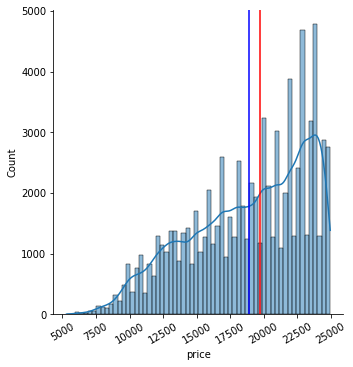

In [ ]:
# 가격분포 확인 후 이상치 제거
sns.displot(df[df.price < 25000].price, kde=True); #백만단위> 10,000,000,000 (백억단위) / 20억 이하 매물로 줄이기
plt.axvline(df[df.price < 25000].price.mean(), color='blue');
plt.axvline(df[df.price < 25000].price.median(), color='red');
plt.xticks(rotation=30);

df[df.price > 200000].price.count() 
#140억 이상 > 1개
#100억 이상 > 5개
#70억 이상 > 83개
#40억 이상 > 1362개 (타워팰리스 등) 
#20억 이상 > 16493개 (타워팰리스 등)
#2억5천 이하 > 85000개
#1억5천 이하 > 18000개
#1억 이하 > 2000개 / 
#5천 이하 > 10개 / 16년도 이전(삭제)

# df[(df.price < 400000)&(df.price > 200000)].apt_name.unique()

# df[df.price < 5000].date_year.unique() #5천이하 시기
# df[(df.price < 400000)&(df.price > 200000)].apt_name.unique() #20억~40억 사이 매물

In [ ]:
pd.set_option('display.max_columns', None) 

In [12]:
# 아파트 정보 병합
filename10 = '서울시_공동주택_정보.csv'
df_aptinfo = pd.read_csv(filename10, encoding='cp949',encoding_errors='ignore',engine='python') 
df_aptinfo = df_aptinfo.rename(columns={'k-아파트명' : 'apt_name', '주소(시군구)': 'add_gu', '주소(읍면동)':'add_dong', '주소(도로명)' :'add_street',
       'k-세대타입(분양형태)':'type_sale', 'k-관리방식':'type_manage', 'k-복도유형':'type_corridor', 'k-난방방식':'type_fuel', 'k-전체세대수':'apt_flat_num',
       'k-건설사(시공사)':'contractor', '주차대수':'parking_lot_num', 
       '좌표X':'location_x', '좌표Y':'location_y'})

df_aptinfo['area_ratio'] = (df_aptinfo['k-연면적'] / df_aptinfo['건축면적'])*100 # 용적률 = 연면적 / 건축면적
df_aptinfo = df_aptinfo[['apt_name', 'add_gu', 'add_dong', 'add_street','type_sale','type_manage', 'type_corridor', 'type_fuel', 'apt_flat_num', 'area_ratio','kapt도로명주소',
                        'contractor','parking_lot_num','location_x','location_y']]

df_aptinfo.kapt도로명주소 = df_aptinfo.kapt도로명주소.fillna('no no')

from numpy import inf
df_aptinfo.iloc[df_aptinfo[df_aptinfo['area_ratio'] == inf].index,9] = 0
df_aptinfo.iloc[df_aptinfo[df_aptinfo['area_ratio'] == 0].index,9] = -1

# 인코딩 / 복도유형 (출현순서)
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '복도식'].index,6] = 1
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '계단식'].index,6] = 2
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '혼합식'].index,6] = 3
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '타워형'].index,6] = 4
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '기타'].index,6] = 0


# 인코딩 / 난방유형 (출현순서)
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '중앙난방'].index,7] = 1
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '지역난방'].index,7] = 2
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '개별난방'].index,7] = 3
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '기타'].index,7] = 0


# 키 부여 / 주소
df_aptinfo['add_new'] = None
df_aptinfo.kapt도로명주소 = df_aptinfo.kapt도로명주소.astype('str')

for i in range(0, df_aptinfo.shape[0]):
  df_aptinfo.iloc[i, -1] = df_aptinfo.iloc[i, 10].split(' ')[-2] + df_aptinfo.iloc[i, 10].split(' ')[-1]

df = pd.merge(df, df_aptinfo[['type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y','add_new']]
         , how='left',left_on=['address_street'], right_on=['add_new']) #192624

df_aptinfo.head()

,apt_name,add_gu,add_dong,add_street,type_sale,type_manage,type_corridor,type_fuel,apt_flat_num,area_ratio,kapt도로명주소,contractor,parking_lot_num,location_x,location_y,add_new
0,우리유앤미,동작구,흑석동,서달로,분양,위탁관리,3,3,206.0,1527.831029,서울특별시 동작구 서달로 83,우리건설,223.0,126.959639,37.500668,서달로83
1,송파파인타운13단지,송파구,장지동,송파대로8길,분양,위탁관리,2,3,197.0,-1.000000,서울특별시 송파구 송파대로8길 10,양우건설(주),225.0,127.129179,37.476897,송파대로8길10
2,오금현대백조(임대),송파구,오금동,양재대로72길,임대,위탁관리,1,3,153.0,106.168910,서울특별시 송파구 양재대로72길 20,현대건설,60.0,127.128775,37.508906,양재대로72길20
3,개봉건영,구로구,개봉동,고척로21나길,분양,위탁관리,2,3,209.0,-1.000000,서울특별시 구로구 고척로21나길 85-6,건영종합건설,0.0,126.840675,37.501162,고척로21나길85-6
4,월계동원베네스트,노원구,월계동,월계로53길,분양,위탁관리,2,3,205.0,-1.000000,서울특별시 노원구 월계로53길 21,(주)동원건설,206.0,127.058220,37.631732,월계로53길21


In [13]:
# 국제유가 병합
filename = '국제유가.csv' #월별 국제유가
df_dubaioil = pd.read_csv(filename, encoding='cp949',encoding_errors='ignore',engine='python').T.iloc[2:,0].reset_index()
# df_dubaioil['date_year'] = df_dubaioil['index'].split('\.')[0]
df_dubaioil['date_year'] = None
df_dubaioil['date_month'] = None
for i in range(0, df_dubaioil.shape[0]):
  df_dubaioil.iloc[i, -2] = df_dubaioil['index'].str.split('\.')[i][0]
  df_dubaioil.iloc[i, -1] = df_dubaioil['index'].str.split('\.')[i][1]

df_dubaioil = df_dubaioil[['date_year','date_month',0]]
df_dubaioil = df_dubaioil.rename(columns={0:'dubaioilrate'})

#없는데이터추가
df2_add = pd.DataFrame({'date_year' : ['2022', '2022'], 'date_month' : ['10', '11'], 'dubaioilrate' : ['90.9', '86.9']})
df_dubaioil = df_dubaioil.append(df2_add, ignore_index = True)

df_dubaioil = df_dubaioil.astype({'date_year':'int','date_month':'int'})
df_dubaioil = df_dubaioil.astype({'date_year':'str','date_month':'str'})
df = df.astype({'date_year':'str','date_month':'str'})
df = pd.merge(df, df_dubaioil, how='left', left_on=['date_year','date_month'], right_on=['date_year','date_month'])

In [ ]:
df.tail()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,dubaioilrate,type_sale,type_manage,type_fuel,apt_flat_num,area_ratio,parking_lot_num,location_x,location_y,add_new
810197,20221031,서울특별시 영등포구 영등포동4가,2022,10,31,영등포구,영등포동4가,103,103.0,0.0,...,90.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810198,20221031,서울특별시 영등포구 영등포동,2022,10,31,영등포구,영등포동,647,647.0,0.0,...,90.9,분양,위탁관리,3,2462.0,-1.00000,2554.0,126.904549,37.512060,도신로29길28
810199,20221031,서울특별시 노원구 월계동,2022,10,31,노원구,월계동,13,13.0,0.0,...,90.9,분양,자치관리,2,3930.0,1212.08074,2055.0,127.065778,37.623986,마들로111
810200,20221031,서울특별시 노원구 공릉동,2022,10,31,노원구,공릉동,727,727.0,0.0,...,90.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810201,20221031,서울특별시 구로구 구로동,2022,10,31,구로구,구로동,97,97.0,0.0,...,90.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 환율 병합
filename = 'dollar_rate.csv' #월별 국제유가
df_dollar = pd.read_csv(filename, encoding='utf-8',encoding_errors='ignore',engine='python')
df_dollar = df_dollar.astype({'date':'str'})

df_dollar['date_year'] = None
df_dollar['date_month'] = None
for i in range(0, df_dollar.shape[0]):
  df_dollar.iloc[i, -2] = df_dollar['date'].str.split('\.')[i][0]
  df_dollar.iloc[i, -1] = df_dollar['date'].str.split('\.')[i][1]

df_dollar = df_dollar[['date_year','date_month','dollar_rate']]
df_dollar.date_month = df_dollar.date_month.replace('10-','10')


df_dollar = df_dollar.astype({'date_year':'int','date_month':'int'})
df_dollar = df_dollar.astype({'date_year':'str','date_month':'str'})
df = df.astype({'date_year':'str','date_month':'str'})
df = pd.merge(df, df_dollar, how='left', left_on=['date_year','date_month'], right_on=['date_year','date_month'])

In [15]:
# 소비자지수

df['consumerrate'] = df['cpi'] * df['min_wage']

In [ ]:
# EDA 확인
df.iloc[700500]

date                        20191111
address               서울특별시 동대문구 장안동
date_year                       2019
date_month                        11
date_day                          11
add_gu                          동대문구
add_dong                         장안동
address_num                    329-3
address_num_first              329.0
address_num_second               3.0
address_street              장안벚꽃로167
apt_name                     래미안장안2차
area                           81.05
floor                           14.0
construction_year             2007.0
price                          72000
date_on_sale                     NaN
deal_type                          -
real_estate_office                 -
cpi                           99.481
area_type                          3
building_year                   12.0
river                              0
apt_brand                        2.0
baserate                        2.75
park_area                  1275100.0
park_count                        95
p

In [ ]:
df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,apt_brand,baserate,park_area,park_count,park_ratio,newrate,zone,rank_gu,min_wage,min_wage
0,20130101,서울특별시 은평구 대조동,2013,1,1,은평구,대조동,04월 18일,4.0,18.0,...,0.0,2.75,14031200.0,140,0.4722719623022551,256.1185,4.0,15.0,4860,4860
1,20130101,서울특별시 구로구 구로동,2013,1,1,구로구,구로동,1280,1280.0,0.0,...,0.0,2.75,3189400.0,96,0.1585188866799204,256.1185,2.0,20.0,4860,4860
2,20130101,서울특별시 동작구 사당동,2013,1,1,동작구,사당동,1155,1155.0,0.0,...,0.0,2.75,4630500.0,80,0.2832110091743119,256.1185,2.0,8.0,4860,4860
3,20130101,서울특별시 은평구 응암동,2013,1,1,은평구,응암동,176,176.0,0.0,...,2.0,2.75,14031200.0,140,0.4722719623022551,256.1185,4.0,15.0,4860,4860
4,20130101,서울특별시 중구 신당동,2013,1,1,중구,신당동,851,851.0,0.0,...,2.0,2.75,3128100.0,68,0.314066265060241,256.1185,4.0,7.0,4860,4860


#### **시각화**

In [ ]:
df.price

In [ ]:
기준금리에 따른 가격분포
면적에 따른 가격분포
숲면적에 따른 가격분포

In [16]:
df.columns

Index(['date', 'address', 'date_year', 'date_month', 'date_day', 'add_gu',
       'add_dong', 'address_num', 'address_num_first', 'address_num_second',
       'address_street', 'apt_name', 'area', 'floor', 'construction_year',
       'price', 'date_on_sale', 'deal_type', 'real_estate_office', 'cpi',
       'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
       'park_area', 'park_count', 'park_ratio', 'newrate', 'zone', 'rank_gu',
       'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
       'area_ratio', 'parking_lot_num', 'location_x', 'location_y', 'add_new',
       'dubaioilrate', 'dollar_rate', 'consumerrate'],
      dtype='object')

In [22]:
df_new = df[df.date_year >= '2018']

In [42]:
df.columns

Index(['date', 'address', 'date_year', 'date_month', 'date_day', 'add_gu',
       'add_dong', 'address_num', 'address_num_first', 'address_num_second',
       'address_street', 'apt_name', 'area', 'floor', 'construction_year',
       'price', 'date_on_sale', 'deal_type', 'real_estate_office', 'cpi',
       'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
       'park_area', 'park_count', 'park_ratio', 'newrate', 'zone', 'rank_gu',
       'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
       'area_ratio', 'parking_lot_num', 'location_x', 'location_y', 'add_new',
       'dubaioilrate', 'dollar_rate', 'consumerrate'],
      dtype='object')

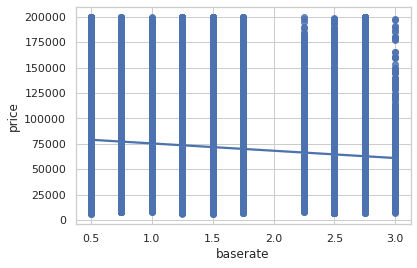

In [34]:
def myplot(x):
  sns.regplot(x=df_new[x], y=df_new['price']);

sns.set(style='whitegrid', context='notebook')
myplot('baserate') #1분

In [24]:
cols_basic = ['price','area','floor','area_type','building_year','river','apt_brand'] # 3분

cols_apt = ['price','area','park_area','park_count','park_ratio',
           'apt_flat_num','area_ratio','parking_lot_num']

cols_park = ['price','area','park_area','park_count','park_ratio']

cols_zone = ['price','area','zone','rank_gu','location_x', 'location_y','area_ratio']


cols_time = ['baserate','cpi','dollar_rate','dubaioilrate','min_wage','price']

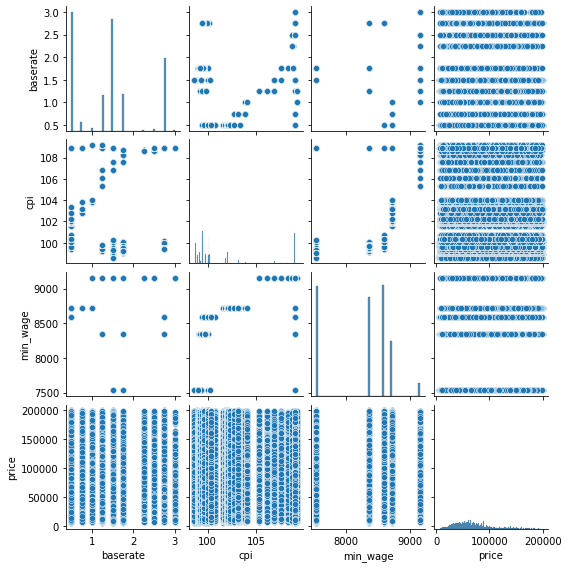

In [29]:
sns.pairplot(df_new[cols_time], height=2);

In [ ]:
# 전역설정 / 한글폰트
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df_corr['price'].sort_values(ascending=False)

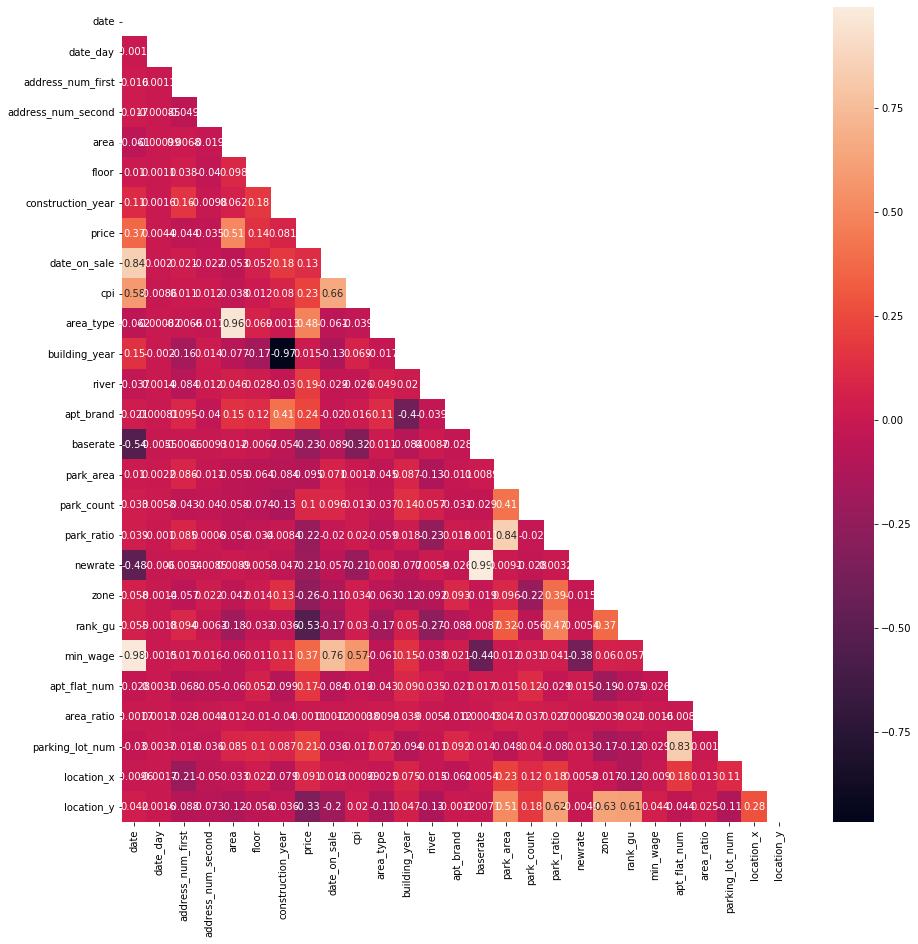

In [ ]:
# 상관계수

df_copy = df.copy()
df_corr = df_copy.corr()
df_corr['price'].sort_values(ascending=False)

plt.figure(figsize=(15, 15));
mask = np.triu(np.ones_like(df_corr));
sns.heatmap(df_corr, mask=mask, annot=True);

#### **데이터 스플릿**

In [16]:
# 데이터 스플릿
df = df.astype({'date_year' : 'int', 'date_month' : 'int', 'park_count':'int'})
train = df[(df['date_year'] <= 2019) & (df['date_year'] >= 2015)]
val = df[(df['date_year'] <= 2021) & (df['date_year'] >= 2020) ]
test = df[df['date_year'] >= 2022]

In [ ]:
df.columns

Index(['date', 'address', 'date_year', 'date_month', 'date_day', 'add_gu',
       'add_dong', 'address_num', 'address_num_first', 'address_num_second',
       'address_street', 'apt_name', 'area', 'floor', 'construction_year',
       'price', 'date_on_sale', 'deal_type', 'real_estate_office', 'cpi',
       'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
       'park_area', 'park_count', 'park_ratio', 'newrate', 'zone', 'rank_gu',
       'min_wage', 'dubaioilrate', 'type_sale', 'type_manage', 'type_fuel',
       'apt_flat_num', 'area_ratio', 'parking_lot_num', 'location_x',
       'location_y', 'add_new', 'dollar_rate'],
      dtype='object')

In [ ]:
# selectKbest
from sklearn.feature_selection import f_regression, SelectKBest

## f_regresison, SelectKBest / 스코어 함수 중 선형회귀에서 주로 사용하는 f_regression

target = 'price'
feature = ['date_year', 'date_month', 'area', 'floor', 'construction_year',
       'deal_type', 'cpi','baserate','newrate','min_wage', 'dubaioilrate', 
       'area_type', 'building_year', 'river', 'apt_brand', 'dollar_rate',
       'park_area', 'park_count', 'park_ratio', 'zone', 'rank_gu',
       'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num', 'area_ratio', 'parking_lot_num', 'location_x','location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train_processed = pipe.fit_transform(X_train)
X_val_processed = pipe.transform(X_val)

selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_processed, y_train)
X_test_selected = selector.transform(X_val_processed)

all_names = X_train.columns 
selected_mask = selector.get_support()   ## bool 형태로 반환

## 선택된 특성들 
selected_names = all_names[selected_mask] 
## 선택되지 않은 특성들 
unselected_names = all_names[~selected_mask]  
print('Selected names: ', selected_names) 
print('Unselected names: ', unselected_names)

Selected names:  Index(['date_year', 'area', 'min_wage', 'dubaioilrate', 'area_type',
       'dollar_rate', 'park_ratio', 'zone', 'rank_gu', 'location_y'],
      dtype='object')
Unselected names:  Index(['date_month', 'floor', 'construction_year', 'deal_type', 'cpi',
       'baserate', 'newrate', 'building_year', 'river', 'apt_brand',
       'park_area', 'park_count', 'type_sale', 'type_manage', 'type_fuel',
       'apt_flat_num', 'area_ratio', 'parking_lot_num', 'location_x'],
      dtype='object')


#### **모델 학습 - Day1**

In [ ]:
# 스케일 효과 보기
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder

target = 'price'
feature = df.drop(columns = 'price').columns

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]

enc = OrdinalEncoder()
X_train_encoded = enc.fit_transform(X_train)

scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train_encoded)

pd.DataFrame(X_train_scaled, columns = X_train.columns).describe()

# 스케일링을 해도 area가 제일 높음 / 나누기 하면?

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,address_street,apt_name,area,floor,construction_year,date_on_sale,deal_type,real_estate_office,cpi,area_type,building_year,river,apt_brand,baserate,park_area,park_count,park_ratio,zone
count,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649460e+05,5.649460e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649940e+05,5.649950e+05,0.0,5.649950e+05,5.649950e+05,5.168900e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.649950e+05,5.348290e+05
mean,-1.291205e-13,4.287696e-15,-4.514408e-12,-1.443638e-13,-5.338851e-15,-6.634536e-16,-1.189352e-14,1.905827e-14,9.798185e-16,-1.750915e-14,-2.363654e-15,6.626039e-14,2.251051e-15,6.504600e-15,-2.797140e-14,NaN,1.856741e-14,1.856741e-14,-1.238531e-12,-7.178300e-15,-6.873394e-14,-1.417730e-13,-1.985363e-13,1.067412e-12,4.255869e-15,1.723155e-14,-8.377781e-15,6.535184e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,NaN,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.687379e+00,-1.303172e+00,-1.650408e+00,-1.640271e+00,-1.698762e+00,-1.751536e+00,-1.305106e+00,-8.878177e-01,-1.100477e+00,-1.309821e-01,-9.523124e-01,-8.594674e-01,-2.415290e+00,-2.162537e+00,-4.110316e+00,NaN,-1.881453e-03,-1.881453e-03,-1.612363e+00,-2.112124e+00,-2.331813e+00,-4.228584e-01,-4.701543e-01,-9.705313e-01,-1.233628e+00,-2.155754e+00,-1.268623e+00,-1.556193e+00
25%,-9.867744e-01,-7.696197e-01,-1.014546e+00,-7.118636e-01,-8.973197e-01,-8.555517e-01,-7.666912e-01,-6.498119e-01,-7.395037e-01,-1.309821e-01,-7.254671e-01,-6.797269e-01,-6.464477e-01,-8.214771e-01,-6.423669e-01,NaN,-1.881453e-03,-1.881453e-03,-6.809504e-01,-9.376880e-01,-7.175947e-01,-4.228584e-01,-4.701543e-01,-9.705313e-01,-7.986764e-01,-7.819047e-01,-8.500330e-01,-5.031683e-01
50%,2.355747e-01,-1.527000e-01,2.571787e-01,-9.292536e-02,1.861388e-02,4.043223e-02,-1.609749e-01,-3.286791e-01,-1.777747e-01,-1.309821e-01,-3.593119e-01,-3.772853e-01,2.240466e-01,-1.509471e-01,1.162469e-01,NaN,-1.881453e-03,-1.881453e-03,-2.357341e-01,2.367475e-01,-7.190753e-02,-4.228584e-01,-4.701543e-01,-4.587430e-01,-4.880316e-01,-2.190294e-02,-4.839025e-01,5.498569e-01
75%,8.914166e-01,5.809343e-01,8.930409e-01,8.354820e-01,8.200558e-01,9.364161e-01,5.793451e-01,2.199594e-01,4.244914e-01,-1.060458e-01,3.409731e-01,2.597654e-01,2.555318e-01,6.872154e-01,6.581140e-01,NaN,-1.881453e-03,-1.881453e-03,8.343029e-01,2.367475e-01,6.813942e-01,-4.228584e-01,-4.701543e-01,5.648336e-01,7.352350e-01,8.550222e-01,6.869452e-01,5.498569e-01
max,1.568271e+00,4.249106e+00,1.528903e+00,1.763889e+00,1.735989e+00,1.832400e+00,4.264119e+00,4.603816e+00,8.454706e+00,7.061353e+01,3.553637e+00,3.816438e+00,8.570130e+00,1.007463e+01,2.175342e+00,NaN,5.315040e+02,5.315040e+02,2.187659e+00,2.585619e+00,4.340288e+00,2.364858e+00,3.611784e+00,2.100198e+00,2.059669e+00,1.644255e+00,2.695528e+00,1.602882e+00


In [ ]:
#단순선형회귀모델
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터스플릿

target = 'price'
feature = 'area'

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 정확도 계산 / .score()
# R2(결정계수)는 예측값 도출하지 않아도(.predict) 바로 계산 가능
score = pipe.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = pipe.score(X_val, y_val) 
print(f'테스트 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러: {mae_train:.2f}') 
print(f'검증 에러: {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1

# 훈련 에러(R2): 0.41
# 테스트 에러(R2): 0.04
# 훈련 에러: 18969.63
# 검증 에러: 36081.80
# Metric	Score
# 0	MSE	3.134206e+09
# 1	MAE	3.608180e+04
# 2	RMSE	5.598398e+04
# 3	R2	4.000000e-02

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#다중선형회귀모델
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터스플릿

target = 'price'
feature = ['date_year', 'date_month', 'add_gu',
          'add_dong','apt_name', 'area', 'floor','deal_type', 'cpi',
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train) 


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 정확도 계산 / .score()
# R2(결정계수)는 예측값 도출하지 않아도(.predict) 바로 계산 가능
score = pipe.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = pipe.score(X_val, y_val) 
print(f'테스트 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러: {mae_train:.2f}') 
print(f'검증 에러: {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

훈련 에러(R2): 0.59
테스트 에러(R2): 0.45
훈련 에러: 16041.79
검증 에러: 27877.70


,Metric,Score
0,MSE,1.798332e+09
1,MAE,2.787770e+04
2,RMSE,4.240674e+04
3,R2,4.500000e-01


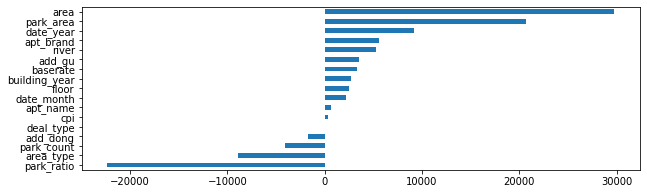

In [ ]:
coefficients = pd.Series(pipe.named_steps['linearregression'].coef_, X_train.columns)  
plt.figure(figsize=(10,3))  
coefficients.sort_values().plot.barh()  
plt.show()

In [ ]:
# 릿지회귀 / zone 추가

from sklearn.linear_model import Ridge, RidgeCV
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_year', 'date_month', 'zone',
          'area', 'floor','deal_type', 'cpi',
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
)

X_train = pipe.fit_transform(X_train) 
X_val = pipe.transform(X_val) 

#RidgeCV를 통한 최적 패널티 파라미터(alpha=lambda) 검증
#alphas(람다값)은 0 이상의 포지티브 값으로 들어가야 하나 음수를 넣어도 값을 도출됨
alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(X_train, y_train)
print(f'cv best alpha:  {ridge.alpha_}') #최적 패널티(람다값) 반환
print(f'cv best score: {ridge.best_score_}') #가장 성능 좋은 score 반환


y_pred = ridge.predict(X_val)

score = ridge.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = ridge.score(X_val, y_val) 
print(f'테스트 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = ridge.predict(X_train) 
y_pred_val = ridge.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1

# cv best alpha:  0.01
# cv best score: 0.5578702574881306
# 훈련 에러(R2): 0.59
# 테스트 에러(R2): 0.44
# 훈련 에러: 15941.67 / 1억5천
# 검증 에러: 27556.12 / 2억7천

# Metric	Score
# 0	MSE	1.822219e+09
# 1	MAE	2.755612e+04
# 2	RMSE	4.268746e+04
# 3	R2	4.400000e-01

cv best alpha:  0.01
cv best score: 0.5614746070105676
훈련 에러(R2): 0.59
테스트 에러(R2): 0.44
훈련 에러(MAE): 15928.35
검증 에러(MAE): 27773.21


,Metric,Score
0,MSE,1.817287e+09
1,MAE,2.777321e+04
2,RMSE,4.262965e+04
3,R2,4.400000e-01


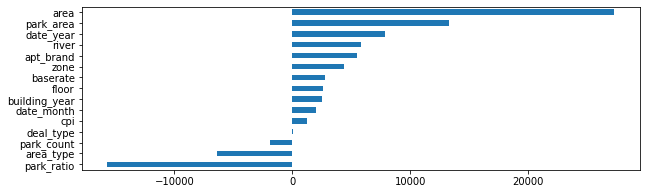

In [ ]:
coefficients = pd.Series(ridge.coef_, feature)
plt.figure(figsize=(10,3))  
coefficients.sort_values().plot.barh()  
plt.show()

In [ ]:
# 랜덤포레스트회귀
# 몇분 걸렸는지 기록하기

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_year', 'date_month', 'zone',
          'area', 'floor','deal_type', 'cpi',
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=100)
)


pipe.fit(X_train, y_train)

k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k,scoring='r2')
scores2 = cross_val_score(pipe, X_val, y_val, cv=k,scoring='r2')


# score = pipe.score(X_train, y_train) 
# print(f'훈련 에러(R2) for {k}: {scores:.2f}') 
# score = pipe.score(X_val, y_val) 
# print(f'테스트 에러(R2) for{k}: {scores2:.2f}')

ImportError: ignored

In [ ]:
y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1


훈련 에러(MAE): 7066.04
검증 에러(MAE): 20765.35


,Metric,Score
0,MSE,7.747714e+08
1,MAE,2.076535e+04
2,RMSE,2.783472e+04
3,R2,5.100000e-01


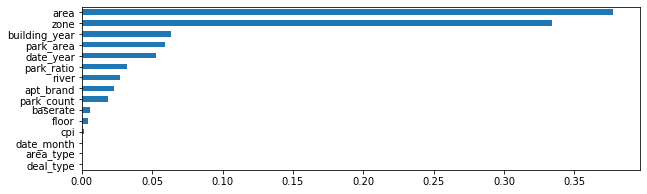

In [ ]:
coefficients = pd.Series(pipe.named_steps['randomforestregressor'].feature_importances_, X_train.columns)
plt.figure(figsize=(10,3))  
coefficients.sort_values().plot.barh()  
plt.show()

In [ ]:
# permuter / 40초
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['randomforestregressor'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['ordinalencoder'].transform(X_val)
X_val_impute = pipe.named_steps['simpleimputer'].transform(X_val_transformed)
X_val_scale = pipe.named_steps['standardscaler'].transform(X_val_impute)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_scale, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

baserate        -0.000489
cpi             -0.000076
date_year        0.000000
deal_type        0.000000
area_type        0.000188
date_month       0.001960
floor            0.003501
river            0.044210
park_ratio       0.049570
apt_brand        0.056743
park_count       0.065794
building_year    0.139636
park_area        0.187234
zone             0.420414
area             0.505511
dtype: float64

In [ ]:
#다중선형회귀모델 / 20분
#이상치 제거 + onehotEncoder > 
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터스플릿

df = df.astype({'date_year' : 'int', 'date_month' : 'int', 'park_count':'int'})

train = df[df['date_year'] <= 2018]
val = df[(df['date_year'] <= 2020) & (df['date_year'] >= 2019) ]
test = df[df['date_year'] >= 2021]


target = 'price'
feature = ['area', 'floor','deal_type', 'cpi', #아파트 이름은 안되겠네
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]

encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)  #onehot= 차원이 370개...


#모델학습 / onehot > 1분30초
pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(random_state=2, n_estimators=1000, max_depth=10),
)

pipe.fit(X_train, y_train) 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 정확도 계산 / .score()
# R2(결정계수)는 예측값 도출하지 않아도(.predict) 바로 계산 가능
score = pipe.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = pipe.score(X_val, y_val) 
print(f'테스트 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러: {mae_train:.2f}') 
print(f'검증 에러: {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1


#훈련 에러(R2): 0.86
# 테스트 에러(R2): 0.29
# 훈련 에러: 7810.45
# 검증 에러: 24096.80

# Metric	Score
# 0	MSE	1.130180e+09
# 1	MAE	2.409680e+04
# 2	RMSE	3.361814e+04
# 3	R2	2.900000e-01

In [ ]:
# 타겟인코더
# xgboost regressor
# 결정트리회귀, 랜덤포레스트회귀, xgboost 회귀, 다항회귀

KeyboardInterrupt: ignored

In [ ]:
# 파이캐럿 연산 
# 몇분?? / 1시간 30분

from pycaret.regression import *

feature = ['area', 'floor','deal_type', 'cpi',
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio', 'price']
          
train = train[feature]
        
setup_rgs = setup(data=train, target='price',session_id=10)
top5 = compare_models(sort='R2', n_select=5)
top5

ModuleNotFoundError: ignored

**pycaret 사용법**
- https://ideal-dominate.medium.com/pycaret-regression-%EA%B0%99%EC%9D%B4-%ED%95%B4%EB%B4%90%EC%9A%94-eaf0e36268
- https://minimin2.tistory.com/137


#### **모델 학습 - Day2**

In [ ]:
pd.set_option('float_format', '{:}'.format)

훈련 에러(R2): 0.69
테스트 에러(R2): 0.21
훈련 에러(MAE): 11765.82
검증 에러(MAE): 26876.46
  Metric         Score
0    MSE 1231353823.96
1    MAE      26876.46
2   RMSE      35090.65
3     R2          0.21


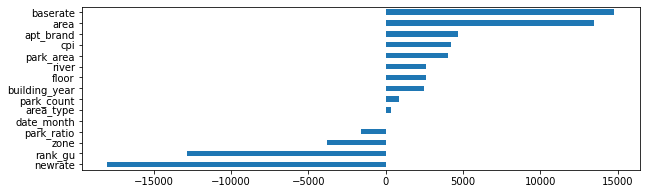

In [ ]:
#다중선형회귀모델
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터스플릿

target = 'price'
feature = ['date_month', 'rank_gu', 'area', 'floor', 'cpi','zone',
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio','newrate']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train) 


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 정확도 계산 / .score()
# R2(결정계수)는 예측값 도출하지 않아도(.predict) 바로 계산 가능
score = pipe.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = pipe.score(X_val, y_val) 
print(f'테스트 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1.head())

# 회귀계수 출력
coefficients = pd.Series(pipe.named_steps['linearregression'].coef_, X_train.columns)  
plt.figure(figsize=(10,3))  
coefficients.sort_values().plot.barh()  
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 4.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 0.24.2 which is incompatible.
eli5 0.13.0 requires jinja2>=3.0.0, but you have jinja2 2.11.3 which is incompatible.


In [ ]:
# 랜덤포레스트회귀 / 2분

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_year', 'date_month','area', 'floor','deal_type', 'cpi', 'zone', 'rank_gu','newrate',
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=100)
)


pipe.fit(X_train, y_train) #2분

# k = 3
# scores = cross_val_score(pipe, X_train, y_train, cv=k,scoring='neg_mean_absolute_error') #4분이상
# scores2 = cross_val_score(pipe, X_val, y_val, cv=k,scoring='neg_mean_absolute_error')


y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

훈련 에러(MAE): 6434.82
검증 에러(MAE): 20948.27
  Metric        Score
0    MSE 784276932.12
1    MAE     20948.27
2   RMSE     28004.94
3     R2          0.5


In [ ]:
# permuter / 40초
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['randomforestregressor'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['ordinalencoder'].transform(X_val)
X_val_impute = pipe.named_steps['simpleimputer'].transform(X_val_transformed)
X_val_scale = pipe.named_steps['standardscaler'].transform(X_val_impute)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_scale, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

RuntimeError: ignored

rank_gu              0.6114633964491685
area                 0.4870476441658697
building_year       0.13582923369634198
apt_brand           0.07032389867130975
river                0.0475850419679978
park_count         0.037451923524076315
park_area           0.03480344816460505
park_ratio         0.009943091382958968
zone               0.004462425360845601
date_month        0.0035021813647971188
floor             0.0026956238378148313
cpi                8.49180278854611e-06
date_year        1.1102230246251565e-16
deal_type         8.881784197001253e-17
area_type       -0.00012587784059128193
baserate          -0.003351618028312564
newrate           -0.014154964820512816
dtype: float64

In [ ]:
# XGBregressor / 3분

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','newrate',
          'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:56126.48218	validation_1-rmse:82988.87563
[1]	validation_0-rmse:50795.52446	validation_1-rmse:77611.32848
[2]	validation_0-rmse:46008.06936	validation_1-rmse:72733.50018
[3]	validation_0-rmse:41708.13019	validation_1-rmse:68347.95291
[4]	validation_0-rmse:37862.57818	validation_1-rmse:64415.48976
[5]	validation_0-rmse:34419.53229	validation_1-rmse:60912.31040
[6]	validation_0-rmse:31340.75818	validation_1-rmse:57833.26586


KeyboardInterrupt: ignored

In [ ]:
# permuter / 6분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

AttributeError: ignored

In [ ]:
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

rank_gu             0.6325907045822353
area                0.5652806582732891
building_year       0.2279016750772822
apt_brand          0.07702908743438344
river              0.06842037634701044
park_area           0.0639404147288843
park_count         0.05080584708513754
park_ratio         0.02689309271548972
date_month        0.018554553318069832
floor               0.0173412878413149
zone              0.016124286443732604
cpi             0.00041684694857182516
baserate        2.5059968724017166e-05
date_year                          0.0
area_type                          0.0
deal_type                          0.0
newrate          -0.005522731342677001
dtype: float64

- XGB 성능올리기 https://injo.tistory.com/44

In [ ]:
# AdaBoostRegressor / 3분

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor


target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','newrate',
          'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10), 
                          random_state=2, n_estimators=1000, learning_rate=0.1)

model.fit(X_train, y_train)

         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

훈련 에러(MAE): 18889.05
검증 에러(MAE): 24997.79
  Metric         Score
0    MSE 1038974882.43
1    MAE      24997.79
2   RMSE      32233.13
3     R2          0.37
훈련 정확도 0.48003125009607717
검증 정확도 0.3691307485427573


In [ ]:
# 릿지회귀 / 5초

from sklearn.linear_model import Ridge, RidgeCV
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'newrate',
          'building_year', 'river', 'apt_brand', 'baserate','min_wage',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
)

X_train = pipe.fit_transform(X_train) 
X_val = pipe.transform(X_val) 

#RidgeCV를 통한 최적 패널티 파라미터(alpha=lambda) 검증
#alphas(람다값)은 0 이상의 포지티브 값으로 들어가야 하나 음수를 넣어도 값을 도출됨
alphas = [0.001, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(X_train, y_train)
print(f'cv best alpha:  {ridge.alpha_}') #최적 패널티(람다값) 반환
print(f'cv best score: {ridge.best_score_}') #가장 성능 좋은 score 반환


y_pred = ridge.predict(X_val)

score = ridge.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = ridge.score(X_val, y_val) 
print(f'검증 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = ridge.predict(X_train) 
y_pred_val = ridge.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

# 회귀계수 출력
coefficients = pd.Series(ridge.coef_, feature)  
plt.figure(figsize=(10,3))  
coefficients.sort_values().plot.barh()  
plt.show()

AttributeError: ignored

In [ ]:
# XGBregressor / 12분, 아파트정보추가

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu',
           'newrate','min_wage','baserate','cpi', 
           'type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y',
          'building_year', 'river', 'apt_brand', 'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:55673.39854	validation_1-rmse:82925.48685
[1]	validation_0-rmse:50348.96513	validation_1-rmse:77508.18588
[2]	validation_0-rmse:45559.13848	validation_1-rmse:72579.28794
[3]	validation_0-rmse:41259.83282	validation_1-rmse:68139.92117
[4]	validation_0-rmse:37399.09193	validation_1-rmse:64222.94566
[5]	validation_0-rmse:33940.58407	validation_1-rmse:60853.45470
[6]	validation_0-rmse:30833.17439	validation_1-rmse:57625.50477
[7]	validation_0-rmse:28044.70369	validation_1-rmse:54683.92841
[8]	validation_0-rmse:25561.58355	validation_1-rmse:52179.17451
[9]	validation_0-rmse:23331.56319	validation_1-rmse:49937.99242
[10]	validation_0-rmse:21348.26396	validation_1-rmse:47927.36523
[11]	validation_0-rmse:19566.24901	validation_1-rmse:46129.45384
[12]	validation_0-rmse:17985.45146	validation_1-rmse:44440.86152
[13]	validation_0-rmse:16573.05075	validation_1-rmse:43000.47644
[14]	validation_0-rmse:15313.64137	validation_1-rmse:41631.80740
[15]	validation_0-rmse:14208.02297	

In [ ]:
# XGBregressor / 분, 환율정보추가 > 더 차이가 커졌네

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu',
           'newrate','min_wage','baserate','cpi', 'dollar_rate','dubaioilrate',
           'type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y',
          'building_year', 'river', 'apt_brand', 'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.73277	validation_1-mae:74353.95715
[1]	validation_0-mae:42936.90758	validation_1-mae:70277.60611
[2]	validation_0-mae:38650.02089	validation_1-mae:66402.42263
[3]	validation_0-mae:34791.72968	validation_1-mae:62818.80500
[4]	validation_0-mae:31320.28950	validation_1-mae:59617.17562
[5]	validation_0-mae:28197.51771	validation_1-mae:56900.69139
[6]	validation_0-mae:25391.60971	validation_1-mae:54298.21091
[7]	validation_0-mae:22872.19550	validation_1-mae:52054.97824
[8]	validation_0-mae:20610.95949	validation_1-mae:50146.43753
[9]	validation_0-mae:18586.22327	validation_1-mae:48312.13071
[10]	validation_0-mae:16776.36305	validation_1-mae:46732.24090
[11]	validation_0-mae:15161.05903	validation_1-mae:45270.90422
[12]	validation_0-mae:13727.39483	validation_1-mae:43909.70945
[13]	validation_0-mae:12455.29830	validation_1-mae:42702.85079
[14]	validation_0-mae:11331.21380	validation_1-mae:41554.38364
[15]	validation_0-mae:10339.94073	validation_1-mae:40689.00366
[1

In [ ]:
# permuter / 2분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

area               0.393485
rank_gu            0.386798
building_year      0.077552
apt_brand          0.037664
location_y         0.029699
park_area          0.019616
park_count         0.018451
newrate            0.013106
river              0.011776
floor              0.008847
apt_flat_num       0.006317
type_fuel          0.005135
date_month         0.004357
location_x         0.002867
type_sale          0.002601
park_ratio         0.001837
zone               0.000554
baserate           0.000124
type_manage        0.000093
cpi                0.000008
min_wage           0.000000
dollar_rate       -0.000037
dubaioilrate      -0.000443
area_ratio        -0.005897
parking_lot_num   -0.010633
dtype: float64

In [ ]:
# XGBregressor / kbest만 넣어보자 

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_year', 'area', 'min_wage', 'dubaioilrate', 'area_type',
          'dollar_rate', 'park_ratio', 'zone', 'rank_gu', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:55634.95559	validation_1-rmse:83579.92511
[1]	validation_0-rmse:50371.22720	validation_1-rmse:79201.73914
[2]	validation_0-rmse:45655.33332	validation_1-rmse:75137.68721
[3]	validation_0-rmse:41433.83027	validation_1-rmse:71484.56089
[4]	validation_0-rmse:37657.52734	validation_1-rmse:68476.15402
[5]	validation_0-rmse:34285.02364	validation_1-rmse:65586.50113
[6]	validation_0-rmse:31261.41916	validation_1-rmse:63153.55346
[7]	validation_0-rmse:28585.49629	validation_1-rmse:61251.33897
[8]	validation_0-rmse:26188.04781	validation_1-rmse:59101.10361
[9]	validation_0-rmse:24062.73555	validation_1-rmse:57432.25777
[10]	validation_0-rmse:22187.43559	validation_1-rmse:55952.15630
[11]	validation_0-rmse:20516.58210	validation_1-rmse:54445.44117
[12]	validation_0-rmse:19049.10247	validation_1-rmse:53206.21610
[13]	validation_0-rmse:17753.21541	validation_1-rmse:52065.22766
[14]	validation_0-rmse:16615.94678	validation_1-rmse:51150.39211
[15]	validation_0-rmse:15627.16107	

In [ ]:
# permuter / 2분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

area            0.439148
rank_gu         0.420308
location_y      0.174888
park_ratio      0.019635
zone            0.018047
dubaioilrate    0.000207
dollar_rate     0.000148
date_year       0.000000
min_wage        0.000000
area_type       0.000000
dtype: float64

In [ ]:
from hyperopt import hp
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error


target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu',
           'newrate','min_wage','baserate','cpi', 'dollar_rate','dubaioilrate',
           'type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y',
          'building_year', 'river', 'apt_brand', 'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


params = {
    "simpleimputer__strategy": hp.choice("strategy", ["median", "mean"]),
    "xgbregressor__max_depth": hp.quniform("max_depth", 1, 10, 1),
    "xgbregressor__n_estimators ": hp.randint("n_estimators", 3000),
    "xgbregressor__learning_rate ": hp.uniform("learning_rate", 0.01, 0.2)
}

from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
import numpy as np


def get_pipe(params):
    params["xgbregressor__max_depth"] = int(params["xgbregressor__max_depth"]) #quniform은 정수형변환
    pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(random_state=2))
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):
    pipe = get_pipe(params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
    score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="r2")
    r2_score = np.mean(score)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.
    return {"loss": -r2, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=10
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 r2: ", -trials.best_trial["result"]["loss"])

100%|██████████| 10/10 [01:17<00:00,  7.73s/it, best loss: -0.08442615505729767]
최적 하이퍼파라미터:  {'learning_rate': [0.19090636528601465], 'max_depth': [5.0], 'n_estimators': [1290], 'strategy': [0]}
최적 r2:  0.08442615505729767


In [ ]:
# XGBregressor / 베이지안서치 적용(+넣은값), 13분

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu',
           'newrate','min_wage','baserate','cpi', 'dollar_rate','dubaioilrate',
           'type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y',
          'building_year', 'river', 'apt_brand', 'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]




#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 3, n_jobs=-1, random_state=2, n_estimators=2364, learning_rate=0.13460465237652064)

model.fit(X_train, y_train) 

y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))


# model = XGBRegressor(max_depth = 5, n_jobs=-1, random_state=2, n_estimators=1290, learning_rate=0.19090636528601465)

# 베이지안서치 적용(+ 넣은값), 13분
# 훈련 에러(MAE): 3639.83
# 검증 에러(MAE): 32056.06
#   Metric         Score
# 0    MSE  1.463184e+09
# 1    MAE  3.205606e+04
# 2   RMSE  3.825159e+04
# 3     R2  8.000000e-02
# 훈련 정확도 0.9654948891665887
# 검증 정확도 0.08442615505729767

# 베이지안서치 적용(- 넣은값), 16분
# 훈련 에러(MAE): 2748.74
# 검증 에러(MAE): 33273.77
#   Metric         Score
# 0    MSE  1.549051e+09
# 1    MAE  3.327377e+04
# 2   RMSE  3.935799e+04
# 3     R2  3.000000e-02
# 훈련 정확도 0.9802021205215257
# 검증 정확도 0.03069575431534266

훈련 에러(MAE): 3639.83
검증 에러(MAE): 32056.06
  Metric         Score
0    MSE  1.463184e+09
1    MAE  3.205606e+04
2   RMSE  3.825159e+04
3     R2  8.000000e-02
훈련 정확도 0.9654948891665887
검증 정확도 0.08442615505729767


In [ ]:
# permuter / 2분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

KeyboardInterrupt: ignored

In [ ]:
# XGBregressor / 상관계수 높은 값만

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu','area_type',
           'min_wage','cpi', 'dollar_rate','dubaioilrate',
           'type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y',
          'building_year', 'river', 'apt_brand', 'park_area', 'park_count']


X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]

#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.73521	validation_1-mae:74310.03233
[1]	validation_0-mae:42936.82438	validation_1-mae:69861.09476
[2]	validation_0-mae:38649.92436	validation_1-mae:66188.85848
[3]	validation_0-mae:34791.60847	validation_1-mae:62729.70583
[4]	validation_0-mae:31320.08205	validation_1-mae:59459.06054
[5]	validation_0-mae:28197.48556	validation_1-mae:56854.91421
[6]	validation_0-mae:25391.48328	validation_1-mae:54169.63524
[7]	validation_0-mae:22870.48831	validation_1-mae:52182.67697
[8]	validation_0-mae:20610.39145	validation_1-mae:50174.98595
[9]	validation_0-mae:18585.68855	validation_1-mae:48391.45723
[10]	validation_0-mae:16776.12687	validation_1-mae:46887.35064
[11]	validation_0-mae:15163.30584	validation_1-mae:45434.31835
[12]	validation_0-mae:13727.60299	validation_1-mae:44179.38139
[13]	validation_0-mae:12455.72820	validation_1-mae:43171.65231
[14]	validation_0-mae:11334.02637	validation_1-mae:42056.30206
[15]	validation_0-mae:10342.32616	validation_1-mae:41241.11211
[1

In [ ]:
# XGBregressor / rate 바꾼값만

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','min_wage',
          'building_year', 'river', 'apt_brand', 'dollar_rate',
          'park_area', 'park_count', 'park_ratio']


X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=30
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤



y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.95150	validation_1-mae:75007.40333
[1]	validation_0-mae:42938.03106	validation_1-mae:71499.96179
[2]	validation_0-mae:38651.75282	validation_1-mae:68344.40451
[3]	validation_0-mae:34794.60913	validation_1-mae:65525.88623
[4]	validation_0-mae:31326.06166	validation_1-mae:63012.28631
[5]	validation_0-mae:28207.97021	validation_1-mae:60312.63927
[6]	validation_0-mae:25408.73304	validation_1-mae:58305.88229
[7]	validation_0-mae:22898.70260	validation_1-mae:56513.73115
[8]	validation_0-mae:20653.74461	validation_1-mae:54864.40796
[9]	validation_0-mae:18651.08080	validation_1-mae:52963.72924
[10]	validation_0-mae:16870.41017	validation_1-mae:51644.36902
[11]	validation_0-mae:15293.06696	validation_1-mae:50484.65284
[12]	validation_0-mae:13901.36973	validation_1-mae:49364.83284
[13]	validation_0-mae:12677.35811	validation_1-mae:48385.75420
[14]	validation_0-mae:11606.60919	validation_1-mae:47593.99476
[15]	validation_0-mae:10676.87050	validation_1-mae:46822.30410
[1

In [ ]:
# XGBregressor / 삶의질요소 뺀 값

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','min_wage',
          'building_year', 'river', 'apt_brand', 'baserate']


X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=30
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤



y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.89439	validation_1-mae:72606.19766
[1]	validation_0-mae:42938.12422	validation_1-mae:66955.31188
[2]	validation_0-mae:38651.66118	validation_1-mae:61948.24066
[3]	validation_0-mae:34794.29117	validation_1-mae:57345.26215
[4]	validation_0-mae:31325.61787	validation_1-mae:53350.92052
[5]	validation_0-mae:28208.88173	validation_1-mae:49716.72388
[6]	validation_0-mae:25411.45578	validation_1-mae:46587.16008
[7]	validation_0-mae:22904.38510	validation_1-mae:43684.80415
[8]	validation_0-mae:20661.69241	validation_1-mae:41108.64725
[9]	validation_0-mae:18663.54767	validation_1-mae:38891.39623
[10]	validation_0-mae:16889.98658	validation_1-mae:36909.28908
[11]	validation_0-mae:15317.58582	validation_1-mae:35097.36771
[12]	validation_0-mae:13932.69956	validation_1-mae:33578.45815
[13]	validation_0-mae:12719.83121	validation_1-mae:32222.14070
[14]	validation_0-mae:11661.16308	validation_1-mae:31010.44322
[15]	validation_0-mae:10746.02972	validation_1-mae:29941.74707
[1

In [ ]:
# XGBregressor / 두바이넣은값

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','min_wage','dubaioilrate',
          'building_year', 'river', 'apt_brand', 'baserate', 'park_area', 'park_count', 'park_ratio']


X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=30
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤



y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.93296	validation_1-mae:74315.90932
[1]	validation_0-mae:42938.04375	validation_1-mae:70355.49461
[2]	validation_0-mae:38651.52216	validation_1-mae:66286.83409
[3]	validation_0-mae:34794.34292	validation_1-mae:62738.60541
[4]	validation_0-mae:31326.05450	validation_1-mae:59801.78250
[5]	validation_0-mae:28208.78228	validation_1-mae:56914.41806
[6]	validation_0-mae:25409.51227	validation_1-mae:54445.58923
[7]	validation_0-mae:22898.98634	validation_1-mae:52050.09964
[8]	validation_0-mae:20654.28541	validation_1-mae:50204.01283
[9]	validation_0-mae:18649.85024	validation_1-mae:48502.14787
[10]	validation_0-mae:16868.77896	validation_1-mae:46839.64020
[11]	validation_0-mae:15291.84186	validation_1-mae:45390.31652
[12]	validation_0-mae:13898.76204	validation_1-mae:44034.78627
[13]	validation_0-mae:12676.05387	validation_1-mae:42795.15503
[14]	validation_0-mae:11607.61884	validation_1-mae:41802.18907
[15]	validation_0-mae:10680.27184	validation_1-mae:40796.55889
[1

In [ ]:
# XGBregressor / 소비자지수 넣은 값

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','min_wage', 'consumerrate',
          'building_year', 'river', 'apt_brand', 'baserate', 'park_area', 'park_count', 'park_ratio']


X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=30
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤



y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.90204	validation_1-mae:72603.34969
[1]	validation_0-mae:42937.83830	validation_1-mae:66931.28116
[2]	validation_0-mae:38651.45749	validation_1-mae:61856.31572
[3]	validation_0-mae:34794.00603	validation_1-mae:57291.81772
[4]	validation_0-mae:31325.52384	validation_1-mae:53372.98350
[5]	validation_0-mae:28208.10607	validation_1-mae:49689.57164
[6]	validation_0-mae:25408.98207	validation_1-mae:46594.99174
[7]	validation_0-mae:22899.24307	validation_1-mae:43654.93014
[8]	validation_0-mae:20653.28271	validation_1-mae:41121.16592
[9]	validation_0-mae:18651.13778	validation_1-mae:38884.76514
[10]	validation_0-mae:16871.41952	validation_1-mae:36858.74923
[11]	validation_0-mae:15295.29730	validation_1-mae:35075.63408
[12]	validation_0-mae:13902.76551	validation_1-mae:33501.67017
[13]	validation_0-mae:12681.22193	validation_1-mae:32155.71029
[14]	validation_0-mae:11614.01105	validation_1-mae:30907.29720
[15]	validation_0-mae:10684.94886	validation_1-mae:29802.71095
[1

In [ ]:
# XGBregressor / 소비자지수 뻥튀기한값

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','min_wage', 'consumerrate',
          'building_year', 'river', 'apt_brand', 'baserate', 'park_area', 'park_count', 'park_ratio']


X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='mae',  #rmse, mae, logloss
          early_stopping_rounds=30
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤



y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-mae:47699.90204	validation_1-mae:72603.34969
[1]	validation_0-mae:42937.83830	validation_1-mae:66931.28116
[2]	validation_0-mae:38651.45749	validation_1-mae:61856.31572
[3]	validation_0-mae:34794.00603	validation_1-mae:57291.81772
[4]	validation_0-mae:31325.52384	validation_1-mae:53372.98350
[5]	validation_0-mae:28208.10607	validation_1-mae:49689.57164
[6]	validation_0-mae:25408.98207	validation_1-mae:46594.99174
[7]	validation_0-mae:22899.24307	validation_1-mae:43654.93014
[8]	validation_0-mae:20653.28271	validation_1-mae:41121.16592
[9]	validation_0-mae:18651.13778	validation_1-mae:38884.76514
[10]	validation_0-mae:16871.41952	validation_1-mae:36858.74923
[11]	validation_0-mae:15295.29730	validation_1-mae:35075.63408
[12]	validation_0-mae:13902.76551	validation_1-mae:33501.67017
[13]	validation_0-mae:12681.22193	validation_1-mae:32155.71029
[14]	validation_0-mae:11614.01105	validation_1-mae:30907.29720
[15]	validation_0-mae:10684.94886	validation_1-mae:29802.71095
[1

In [ ]:
# permuter / 6분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

area             0.593220
rank_gu          0.545838
building_year    0.190081
apt_brand        0.062265
river            0.039685
park_area        0.036922
park_count       0.026944
date_month       0.019203
floor            0.016875
park_ratio       0.015242
zone             0.012761
cpi              0.000268
consumerrate     0.000097
min_wage         0.000000
baserate        -0.002497
dtype: float64

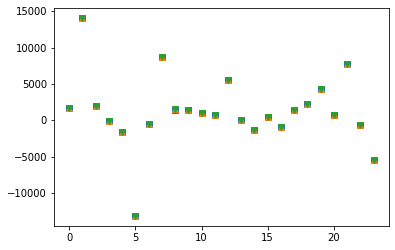

In [ ]:
from sklearn.linear_model import Lasso

# 라쏘 / n분

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'cpi', 'zone', 'rank_gu','dubaioilrate', 'min_wage','dollar_rate',
           'type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y',
          'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1", color='red')
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01", color='blue')
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001", color='green')
plt.show()

In [ ]:
y_pred_train = lasso001.predict(X_train) 
y_pred_val = lasso001.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', lasso001.score(X_train, y_train))
print('검증 정확도', lasso001.score(X_val, y_val))

훈련 에러(MAE): 11603.22
검증 에러(MAE): 22333.99
  Metric         Score
0    MSE  9.046044e+08
1    MAE  2.233399e+04
2   RMSE  3.007664e+04
3     R2  4.300000e-01
훈련 정확도 0.7308287377985966
검증 정확도 0.43395225110460545


#### **Day 3**

In [ ]:
index(['date', 'address', 'date_year', 'date_month', 'date_day', 'add_gu',
       'add_dong', 'address_num', 'address_num_first', 'address_num_second',
       'address_street', 'apt_name', 'area', 'floor', 'construction_year',
       'price', 'date_on_sale', 'deal_type', 'real_estate_office', 'cpi',
       'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
       'park_area', 'park_count', 'park_ratio', 'newrate', 'zone', 'rank_gu',
       'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
       'area_ratio', 'parking_lot_num', 'location_x', 'location_y', 'add_new',
       'dubaioilrate', 'dollar_rate', 'consumerrate'],
      dtype='object')

In [45]:
# XGBregressor / 최소한의 특성만

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu','min_wage','building_year','park_area', 'park_count']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))



[0]	validation_0-rmse:58631.58224	validation_1-rmse:82240.45159
[1]	validation_0-rmse:53058.95004	validation_1-rmse:76200.91458
[2]	validation_0-rmse:48059.95391	validation_1-rmse:70801.20390
[3]	validation_0-rmse:43583.25224	validation_1-rmse:66026.32799
[4]	validation_0-rmse:39574.00667	validation_1-rmse:61717.29574
[5]	validation_0-rmse:35989.11537	validation_1-rmse:58016.45722
[6]	validation_0-rmse:32780.78993	validation_1-rmse:54655.31162
[7]	validation_0-rmse:29922.18041	validation_1-rmse:51659.94803
[8]	validation_0-rmse:27374.99895	validation_1-rmse:48958.68353
[9]	validation_0-rmse:25108.48561	validation_1-rmse:46608.25482
[10]	validation_0-rmse:23084.39294	validation_1-rmse:44484.31205
[11]	validation_0-rmse:21299.14797	validation_1-rmse:42596.20823
[12]	validation_0-rmse:19719.95298	validation_1-rmse:40927.86688
[13]	validation_0-rmse:18319.47961	validation_1-rmse:39406.11945
[14]	validation_0-rmse:17089.87462	validation_1-rmse:38092.96687
[15]	validation_0-rmse:16009.82856	

In [46]:
# XGBregressor / 최소한 + 시계열 특성만
#cols_time = ['baserate','cpi','dollar_rate','dubaioilrate','min_wage','price']

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','area', 'floor', 'zone', 'rank_gu','min_wage', 'apt_brand',
          'baserate','cpi','dollar_rate','dubaioilrate',
           'building_year','park_area', 'park_count']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))



[0]	validation_0-rmse:58620.49230	validation_1-rmse:84507.71664
[1]	validation_0-rmse:53031.95393	validation_1-rmse:80255.68770
[2]	validation_0-rmse:48015.29604	validation_1-rmse:76620.44018
[3]	validation_0-rmse:43523.94185	validation_1-rmse:73335.67085
[4]	validation_0-rmse:39490.90764	validation_1-rmse:70321.15837
[5]	validation_0-rmse:35882.28499	validation_1-rmse:67657.01478
[6]	validation_0-rmse:32656.79366	validation_1-rmse:65295.01977
[7]	validation_0-rmse:29781.33672	validation_1-rmse:63279.75706
[8]	validation_0-rmse:27194.14876	validation_1-rmse:61422.44991
[9]	validation_0-rmse:24902.34949	validation_1-rmse:59737.96990
[10]	validation_0-rmse:22861.87417	validation_1-rmse:58247.11615
[11]	validation_0-rmse:21036.30365	validation_1-rmse:56941.60331
[12]	validation_0-rmse:19427.81806	validation_1-rmse:55754.50624
[13]	validation_0-rmse:17995.83066	validation_1-rmse:54686.96085
[14]	validation_0-rmse:16736.59069	validation_1-rmse:53776.12745
[15]	validation_0-rmse:15626.30423	

In [49]:
# XGBregressor / area 빼면?
#cols_time = ['baserate','cpi','dollar_rate','dubaioilrate','min_wage','price']

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','floor', 'zone', 'rank_gu','min_wage', 'apt_brand', 'area_type',
          'baserate','cpi','dollar_rate','dubaioilrate',
           'building_year','park_area', 'park_count']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))



[0]	validation_0-rmse:58655.01699	validation_1-rmse:84384.92566
[1]	validation_0-rmse:53103.75923	validation_1-rmse:80136.51093
[2]	validation_0-rmse:48130.60549	validation_1-rmse:76303.04178
[3]	validation_0-rmse:43681.15083	validation_1-rmse:73074.44352
[4]	validation_0-rmse:39697.99314	validation_1-rmse:70245.89284
[5]	validation_0-rmse:36135.44686	validation_1-rmse:67635.90411
[6]	validation_0-rmse:32960.96286	validation_1-rmse:65341.82095
[7]	validation_0-rmse:30134.58400	validation_1-rmse:63326.91073
[8]	validation_0-rmse:27611.62440	validation_1-rmse:61508.58294
[9]	validation_0-rmse:25382.30711	validation_1-rmse:59839.79223
[10]	validation_0-rmse:23408.68961	validation_1-rmse:58429.19046
[11]	validation_0-rmse:21669.32681	validation_1-rmse:57137.10556
[12]	validation_0-rmse:20136.50499	validation_1-rmse:55987.15318
[13]	validation_0-rmse:18793.22265	validation_1-rmse:54946.63280
[14]	validation_0-rmse:17617.77779	validation_1-rmse:54025.97232
[15]	validation_0-rmse:16595.12345	

In [52]:
# permuter / 6분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

rank_gu          0.387073
area_type        0.293262
building_year    0.104806
apt_brand        0.059394
park_area        0.024408
park_count       0.024125
floor            0.015745
zone             0.013245
date_month       0.003622
baserate         0.001434
cpi              0.000147
dubaioilrate     0.000021
min_wage         0.000000
dollar_rate      0.000000
dtype: float64

In [53]:

# XGBregressor / rank_gu , area뺀 전체 특성

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'park_ratio', 'zone', 
          'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 3, n_jobs=-1, random_state=2, n_estimators=50, learning_rate=0.1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:58623.40707	validation_1-rmse:82330.67495
[1]	validation_0-rmse:53029.22211	validation_1-rmse:76417.54797
[2]	validation_0-rmse:48015.97998	validation_1-rmse:71064.50447
[3]	validation_0-rmse:43512.02148	validation_1-rmse:66267.13275
[4]	validation_0-rmse:39471.14736	validation_1-rmse:61947.04656
[5]	validation_0-rmse:35847.31403	validation_1-rmse:58111.10600
[6]	validation_0-rmse:32586.14935	validation_1-rmse:54755.51294
[7]	validation_0-rmse:29674.73879	validation_1-rmse:51694.27449
[8]	validation_0-rmse:27067.90120	validation_1-rmse:48967.46247
[9]	validation_0-rmse:24748.18283	validation_1-rmse:46578.69150
[10]	validation_0-rmse:22677.12000	validation_1-rmse:44358.95194
[11]	validation_0-rmse:20828.16109	validation_1-rmse:42398.62736
[12]	validation_0-rmse:19187.17613	validation_1-rmse:40755.52179
[13]	validation_0-rmse:17725.11330	validation_1-rmse:39128.74740
[14]	validation_0-rmse:16433.69767	validation_1-rmse:37799.20317
[15]	validation_0-rmse:15270.53341	

In [54]:
# permuter / 6분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

area_type          0.367473
zone               0.275978
park_area          0.190646
location_y         0.160509
building_year      0.118006
apt_brand          0.050402
river              0.020398
park_count         0.019839
date_month         0.018734
park_ratio         0.018621
type_fuel          0.017064
floor              0.014785
parking_lot_num    0.009438
location_x         0.008202
apt_flat_num       0.006684
type_manage        0.006042
type_sale          0.002530
area_ratio         0.002402
min_wage           0.000000
dtype: float64

In [61]:
# XGBregressor / 파라미터 조정하기

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'park_ratio', 'zone', 
          'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 10, n_jobs=-1, random_state=2, n_estimators=3000, learning_rate=0.08)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59865.94241	validation_1-rmse:83654.46267
[1]	validation_0-rmse:55284.66061	validation_1-rmse:78871.80108
[2]	validation_0-rmse:51088.43602	validation_1-rmse:74337.92597
[3]	validation_0-rmse:47237.51964	validation_1-rmse:70191.15612
[4]	validation_0-rmse:43701.45856	validation_1-rmse:66515.18621
[5]	validation_0-rmse:40450.87961	validation_1-rmse:63038.05084
[6]	validation_0-rmse:37459.57968	validation_1-rmse:59925.53654
[7]	validation_0-rmse:34735.25224	validation_1-rmse:57007.23881
[8]	validation_0-rmse:32218.57059	validation_1-rmse:54399.19212
[9]	validation_0-rmse:29922.77245	validation_1-rmse:51978.01558
[10]	validation_0-rmse:27817.94227	validation_1-rmse:49751.92496
[11]	validation_0-rmse:25893.64530	validation_1-rmse:47720.58097
[12]	validation_0-rmse:24135.11674	validation_1-rmse:45861.94047
[13]	validation_0-rmse:22522.13025	validation_1-rmse:44157.88750
[14]	validation_0-rmse:21056.17110	validation_1-rmse:42547.22981
[15]	validation_0-rmse:19716.34272	

In [65]:
# XGBregressor / 파라미터 조정하기

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'park_ratio', 'zone', 
          'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59346.52869	validation_1-rmse:83077.99940
[1]	validation_0-rmse:54346.79110	validation_1-rmse:77787.01570
[2]	validation_0-rmse:49828.76017	validation_1-rmse:72954.26187
[3]	validation_0-rmse:45714.42929	validation_1-rmse:68648.04444
[4]	validation_0-rmse:41972.52746	validation_1-rmse:64612.12132
[5]	validation_0-rmse:38586.67895	validation_1-rmse:61121.69723
[6]	validation_0-rmse:35542.66832	validation_1-rmse:57720.49907
[7]	validation_0-rmse:32784.34520	validation_1-rmse:54796.04128
[8]	validation_0-rmse:30299.49963	validation_1-rmse:52166.77919
[9]	validation_0-rmse:28032.26038	validation_1-rmse:49719.33234
[10]	validation_0-rmse:26008.00630	validation_1-rmse:47476.45947
[11]	validation_0-rmse:24177.13492	validation_1-rmse:45430.35276
[12]	validation_0-rmse:22523.67804	validation_1-rmse:43670.95519
[13]	validation_0-rmse:21041.51587	validation_1-rmse:42080.98015
[14]	validation_0-rmse:19703.21399	validation_1-rmse:40455.98495
[15]	validation_0-rmse:18502.42970	

In [66]:
# XGBregressor / 파라미터 조정하기 max_depth = 8

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['date_month','floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'park_ratio', 'zone', 
          'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 7, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59411.63480	validation_1-rmse:83148.92004
[1]	validation_0-rmse:54475.60784	validation_1-rmse:77960.21304
[2]	validation_0-rmse:49981.21729	validation_1-rmse:73220.94132
[3]	validation_0-rmse:45915.66354	validation_1-rmse:68886.19222
[4]	validation_0-rmse:42255.17765	validation_1-rmse:64946.31003
[5]	validation_0-rmse:38945.17983	validation_1-rmse:61439.64419
[6]	validation_0-rmse:35926.18245	validation_1-rmse:58350.87585
[7]	validation_0-rmse:33228.27426	validation_1-rmse:55315.06568
[8]	validation_0-rmse:30784.94096	validation_1-rmse:52614.86379
[9]	validation_0-rmse:28560.42803	validation_1-rmse:50320.23844
[10]	validation_0-rmse:26584.51067	validation_1-rmse:48112.61361
[11]	validation_0-rmse:24796.64090	validation_1-rmse:46139.09844
[12]	validation_0-rmse:23174.36313	validation_1-rmse:44392.57068
[13]	validation_0-rmse:21735.38018	validation_1-rmse:42754.98392
[14]	validation_0-rmse:20436.47558	validation_1-rmse:41183.83210
[15]	validation_0-rmse:19252.81476	

In [74]:
# XGBregressor / 파라미터 조정하기 max_depth = 8

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'zone', 
         'apt_flat_num',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59388.57391	validation_1-rmse:84002.33859
[1]	validation_0-rmse:54454.60915	validation_1-rmse:79553.98330
[2]	validation_0-rmse:49983.28679	validation_1-rmse:75429.26865
[3]	validation_0-rmse:45946.84678	validation_1-rmse:71756.42722
[4]	validation_0-rmse:42287.07628	validation_1-rmse:68344.06053
[5]	validation_0-rmse:38978.61484	validation_1-rmse:65335.04765
[6]	validation_0-rmse:35990.98725	validation_1-rmse:62607.55133
[7]	validation_0-rmse:33274.66234	validation_1-rmse:60099.18541
[8]	validation_0-rmse:30827.65948	validation_1-rmse:57856.32749
[9]	validation_0-rmse:28652.72329	validation_1-rmse:55820.50115
[10]	validation_0-rmse:26699.87644	validation_1-rmse:53978.99904
[11]	validation_0-rmse:24932.52483	validation_1-rmse:52267.74179
[12]	validation_0-rmse:23347.76602	validation_1-rmse:50725.91852
[13]	validation_0-rmse:21913.94001	validation_1-rmse:49326.41142
[14]	validation_0-rmse:20627.69893	validation_1-rmse:47987.35837
[15]	validation_0-rmse:19503.83084	

In [73]:
# permuter / 6분
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

#검증셋으로 permutation 중요도 계산
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);
pd.Series(permuter.feature_importances_, feature).sort_values(ascending=False)

area_type          0.363941
zone               0.246625
location_y         0.184968
park_area          0.156134
building_year      0.121717
apt_brand          0.050997
park_count         0.036233
location_x         0.028515
river              0.018274
parking_lot_num    0.016130
floor              0.013331
area_ratio         0.010148
apt_flat_num       0.002722
min_wage           0.000000
dtype: float64

In [69]:
# XGBregressor / 파라미터 조정하기 max_depth = 8

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'zone', 
          'min_wage', 'apt_flat_num','dollar_rate',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59346.51287	validation_1-rmse:84657.14093
[1]	validation_0-rmse:54359.59339	validation_1-rmse:80808.28298
[2]	validation_0-rmse:49835.24389	validation_1-rmse:77314.55966
[3]	validation_0-rmse:45748.92491	validation_1-rmse:74225.27662
[4]	validation_0-rmse:42012.26858	validation_1-rmse:71462.51281
[5]	validation_0-rmse:38634.19824	validation_1-rmse:68806.52544
[6]	validation_0-rmse:35577.86925	validation_1-rmse:66490.41942
[7]	validation_0-rmse:32812.57637	validation_1-rmse:64455.15327
[8]	validation_0-rmse:30310.31729	validation_1-rmse:62606.09587
[9]	validation_0-rmse:28040.19269	validation_1-rmse:60940.38281
[10]	validation_0-rmse:26008.16882	validation_1-rmse:59363.98701
[11]	validation_0-rmse:24173.22201	validation_1-rmse:57994.48220
[12]	validation_0-rmse:22501.94677	validation_1-rmse:56583.75987
[13]	validation_0-rmse:21012.46529	validation_1-rmse:55449.61553
[14]	validation_0-rmse:19663.42906	validation_1-rmse:54464.73749
[15]	validation_0-rmse:18467.01329	

In [71]:
# XGBregressor / 파라미터 조정하기 max_depth = 8

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'zone', 
          'apt_flat_num', 'dubaioilrate',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59346.38677	validation_1-rmse:84736.31987
[1]	validation_0-rmse:54360.96009	validation_1-rmse:80890.21198
[2]	validation_0-rmse:49839.67645	validation_1-rmse:77344.68669
[3]	validation_0-rmse:45736.06978	validation_1-rmse:74266.96720
[4]	validation_0-rmse:42025.33644	validation_1-rmse:71344.66664
[5]	validation_0-rmse:38663.10829	validation_1-rmse:68747.16945
[6]	validation_0-rmse:35611.45656	validation_1-rmse:66529.92325
[7]	validation_0-rmse:32864.33439	validation_1-rmse:64437.58544
[8]	validation_0-rmse:30364.33416	validation_1-rmse:62489.21501
[9]	validation_0-rmse:28107.05241	validation_1-rmse:60806.56158
[10]	validation_0-rmse:26072.36958	validation_1-rmse:59262.62584
[11]	validation_0-rmse:24239.02557	validation_1-rmse:57904.77886
[12]	validation_0-rmse:22591.10231	validation_1-rmse:56715.08956
[13]	validation_0-rmse:21106.63734	validation_1-rmse:55624.82139
[14]	validation_0-rmse:19764.83938	validation_1-rmse:54630.35649
[15]	validation_0-rmse:18577.58680	

In [70]:
# XGBregressor / 파라미터 조정하기 max_depth = 8

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'zone', 
          'min_wage', 'apt_flat_num', 'dubaioilrate',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[0]	validation_0-rmse:59348.17654	validation_1-rmse:84491.90321
[1]	validation_0-rmse:54361.92707	validation_1-rmse:80396.29343
[2]	validation_0-rmse:49849.67763	validation_1-rmse:76539.43898
[3]	validation_0-rmse:45734.17334	validation_1-rmse:73384.98134
[4]	validation_0-rmse:42018.84621	validation_1-rmse:69738.49248
[5]	validation_0-rmse:38629.65058	validation_1-rmse:66984.78930
[6]	validation_0-rmse:35580.43750	validation_1-rmse:64466.43883
[7]	validation_0-rmse:32809.90290	validation_1-rmse:62328.06110
[8]	validation_0-rmse:30317.18607	validation_1-rmse:59519.79339
[9]	validation_0-rmse:28069.46550	validation_1-rmse:57223.68832
[10]	validation_0-rmse:26048.35332	validation_1-rmse:55381.88308
[11]	validation_0-rmse:24208.10609	validation_1-rmse:53829.30820
[12]	validation_0-rmse:22548.83544	validation_1-rmse:52426.46904
[13]	validation_0-rmse:21062.12590	validation_1-rmse:50846.02109
[14]	validation_0-rmse:19728.46336	validation_1-rmse:49673.34264
[15]	validation_0-rmse:18522.33983	

In [96]:
# 랜덤포레스트회귀 /  30분

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'zone', 
          'min_wage', 'apt_flat_num',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=700)
)


pipe.fit(X_train, y_train)

# k = 3
# scores = cross_val_score(pipe, X_train, y_train, cv=k,scoring='neg_mean_absolute_error') #4분이상
# scores2 = cross_val_score(pipe, X_val, y_val, cv=k,scoring='neg_mean_absolute_error')


y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

훈련 에러(MAE): 10157.39
검증 에러(MAE): 22761.42
  Metric         Score
0    MSE  8.825384e+08
1    MAE  2.276142e+04
2   RMSE  2.970755e+04
3     R2  4.500000e-01


In [81]:
df.columns

Index(['date', 'address', 'date_year', 'date_month', 'date_day', 'add_gu',
       'add_dong', 'address_num', 'address_num_first', 'address_num_second',
       'address_street', 'apt_name', 'area', 'floor', 'construction_year',
       'price', 'date_on_sale', 'deal_type', 'real_estate_office', 'cpi',
       'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
       'park_area', 'park_count', 'park_ratio', 'newrate', 'zone', 'rank_gu',
       'min_wage', 'type_sale', 'type_manage', 'type_fuel', 'apt_flat_num',
       'area_ratio', 'parking_lot_num', 'location_x', 'location_y', 'add_new',
       'dubaioilrate', 'dollar_rate', 'consumerrate'],
      dtype='object')

cv best alpha:  0.02
cv best score: 0.6737606107467881
훈련 에러(R2): 0.71
검증 에러(R2): 0.52
훈련 에러(MAE): 12533.33
검증 에러(MAE): 20929.25
  Metric         Score
0    MSE  7.792827e+08
1    MAE  2.092925e+04
2   RMSE  2.791564e+04
3     R2  5.200000e-01


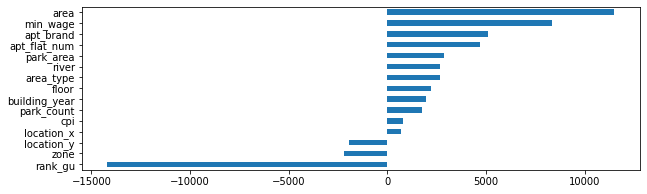

In [28]:
# 릿지회귀 / 5초

from sklearn.linear_model import Ridge, RidgeCV
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['area_type', 'building_year', 'river', 'apt_brand', 'zone', 'cpi', 'location_x', 'location_y',
          'park_area', 'park_count','min_wage', 'apt_flat_num', 'rank_gu', 'area',
          'floor']
       

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
)

X_train = pipe.fit_transform(X_train) 
X_val = pipe.transform(X_val) 

#RidgeCV를 통한 최적 패널티 파라미터(alpha=lambda) 검증
#alphas(람다값)은 0 이상의 포지티브 값으로 들어가야 하나 음수를 넣어도 값을 도출됨
alphas = [0.001, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(X_train, y_train)
print(f'cv best alpha:  {ridge.alpha_}') #최적 패널티(람다값) 반환
print(f'cv best score: {ridge.best_score_}') #가장 성능 좋은 score 반환


y_pred = ridge.predict(X_val)

score = ridge.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = ridge.score(X_val, y_val) 
print(f'검증 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = ridge.predict(X_train) 
y_pred_val = ridge.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

# 회귀계수 출력
coefficients = pd.Series(ridge.coef_, feature)  
plt.figure(figsize=(10,3))  
coefficients.sort_values().plot.barh()  
plt.show()

In [29]:
# XGBregressor / 파라미터 조정하기 max_depth = 8

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


target = 'price'
feature = ['floor', 'area_type', 'building_year', 'river', 'apt_brand',
          'park_area', 'park_count', 'zone', 
          'min_wage', 'apt_flat_num', 'cpi',
          'area_ratio', 'parking_lot_num', 'location_x', 'location_y']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]


#모델학습
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler())

X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)

model = XGBRegressor(max_depth = 8, n_jobs=-1, random_state=2, n_estimators=1000, learning_rate=0.09)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='rmse',  #rmse, mae, logloss
          early_stopping_rounds=20
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


         
y_pred_train = model.predict(X_train) 
y_pred_val = model.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('훈련 정확도', model.score(X_train, y_train))
print('검증 정확도', model.score(X_val, y_val))

[10:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:59352.7	validation_1-rmse:83086.3
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:54367.2	validation_1-rmse:77802.5
[2]	validation_0-rmse:49853.2	validation_1-rmse:72975.1
[3]	validation_0-rmse:45746.2	validation_1-rmse:68627.3
[4]	validation_0-rmse:42020.7	validation_1-rmse:64626
[5]	validation_0-rmse:38651.1	validation_1-rmse:61126.8
[6]	validation_0-rmse:35616.6	validation_1-rmse:57896
[7]	validation_0-rmse:32847.2	validation_1-rmse:54860.6
[8]	validation_0-rmse:30350.5	validation_1-rmse:52212
[9]	validation_0-rmse:28106.5	validation_1-rmse:49667.2
[10]	validation_0-rmse:26091.6	validation_1-rmse:47526.3
[11]	validation_0-rmse:24262.7	validation_1-rmse:45392
[12]	validation_0-rmse:22598.7	validation_1-rmse

#### **최종 평가**

In [ ]:
X_test = test[feature]  
y_test = test[target]

X_test = pipe.transform(X_test)
y_pred_test = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test) #테스트셋의 MAE

print(f'훈련 에러(MAE): {mae_train:.2f}') 
print(f'검증 에러(MAE): {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
print(evaluation1)

print('검증 정확도', model.score(X_test, y_test))

ValueError: ignored